In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# EDA

## Application


In [2]:
df_application_train = pd.read_csv("/kaggle/input/credit-aws/application_train.csv")

In [3]:
df_application_train

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pan

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
df_application_train.shape

(307511, 122)

In [5]:
df_application_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [6]:
# Carregando os dados
X_train = df_application_train.drop(columns=["TARGET"])
y_target = df_application_train["TARGET"]

# Remove colunas com muitos valores nulos
def remove_high_null_columns(X, threshold=0.1):
    null_percent = X.isnull().mean()
    cols_to_keep = null_percent[null_percent <= threshold].index
    return X[cols_to_keep].copy()

# Remove colunas desbalanceadas
def remove_unbalanced_columns(X, threshold=0.60):
    cols_to_keep = [
        col for col in X.columns
        if X[col].value_counts(normalize=True, dropna=False).max() < threshold
    ]
    return X[cols_to_keep].copy()

# Remove colunas altamente correlacionadas
def remove_highly_correlated(X, threshold=0.80):
    # Select only numeric features for correlation calculation
    numeric_features = X.select_dtypes(include=['number'])

    corr_matrix = numeric_features.corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

    # Drop the highly correlated columns from the original DataFrame
    return X.drop(columns=to_drop, errors='ignore')

# Aplicação das transformações
df_application_train_cleaned = X_train.copy()
df_application_train_cleaned = remove_high_null_columns(df_application_train_cleaned, threshold=0.1)
df_application_train_cleaned = remove_unbalanced_columns(df_application_train_cleaned, threshold=0.60)
df_application_train_cleaned = remove_highly_correlated(df_application_train_cleaned, threshold=0.80)

# Garantindo que a coluna TARGET seja preservada
df_application_train_cleaned["TARGET"] = y_target.values

/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)


In [7]:
df_application_train_cleaned

,SK_ID_CURR,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_INCOME_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,ORGANIZATION_TYPE,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,TARGET
0,100002,202500.0,406597.5,24700.5,Working,0.018801,-9461,-637,-3648.0,-2120,1.0,WEDNESDAY,10,Business Entity Type 3,0.262949,2.0,-1134.0,1
1,100003,270000.0,1293502.5,35698.5,State servant,0.003541,-16765,-1188,-1186.0,-291,2.0,MONDAY,11,School,0.622246,1.0,-828.0,0
2,100004,67500.0,135000.0,6750.0,Working,0.010032,-19046,-225,-4260.0,-2531,1.0,MONDAY,9,Government,0.555912,0.0,-815.0,0
3,100006,135000.0,312682.5,29686.5,Working,0.008019,-19005,-3039,-9833.0,-2437,2.0,WEDNESDAY,17,Business Entity Type 3,0.650442,2.0,-617.0,0
4,100007,121500.0,513000.0,21865.5,Working,0.028663,-19932,-3038,-4311.0,-3458,1.0,THURSDAY,11,Religion,0.322738,0.0,-1106.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,157500.0,254700.0,27558.0,Working,0.032561,-9327,-236,-8456.0,-1982,1.0,THURSDAY,15,Services,0.681632,0.0,-273.0,0
307507,456252,72000.0,269550.0,12001.5,Pensioner,0.025164,-20775,365243,-4388.0,-4090,1.0,MONDAY,8,XNA,0.115992,0.0,0.0,0
307508,456253,153000.0,677664.0,29979.0,Working,0.005002,-14966,-7921,-6737.0,-5150,1.0,THURSDAY,9,School,0.535722,6.0,-1909.0,0
307509,456254,171000.0,370107.0,20205.0,Commercial associate,0.005313,-11961,-4786,-2562.0,-931,2.0,WEDNESDAY,9,Business Entity Type 1,0.514163,0.0,-322.0,1


In [8]:
df_application_train_cleaned.duplicated().sum()

0

In [9]:
df_application_train_cleaned.isna().sum()

SK_ID_CURR                       0
AMT_INCOME_TOTAL                 0
AMT_CREDIT                       0
AMT_ANNUITY                     12
NAME_INCOME_TYPE                 0
REGION_POPULATION_RELATIVE       0
DAYS_BIRTH                       0
DAYS_EMPLOYED                    0
DAYS_REGISTRATION                0
DAYS_ID_PUBLISH                  0
CNT_FAM_MEMBERS                  2
WEEKDAY_APPR_PROCESS_START       0
HOUR_APPR_PROCESS_START          0
ORGANIZATION_TYPE                0
EXT_SOURCE_2                   660
OBS_30_CNT_SOCIAL_CIRCLE      1021
DAYS_LAST_PHONE_CHANGE           1
TARGET                           0
dtype: int64

## Analise de Outliers

In [10]:
df_application_train_cleaned = pd.DataFrame(df_application_train_cleaned)

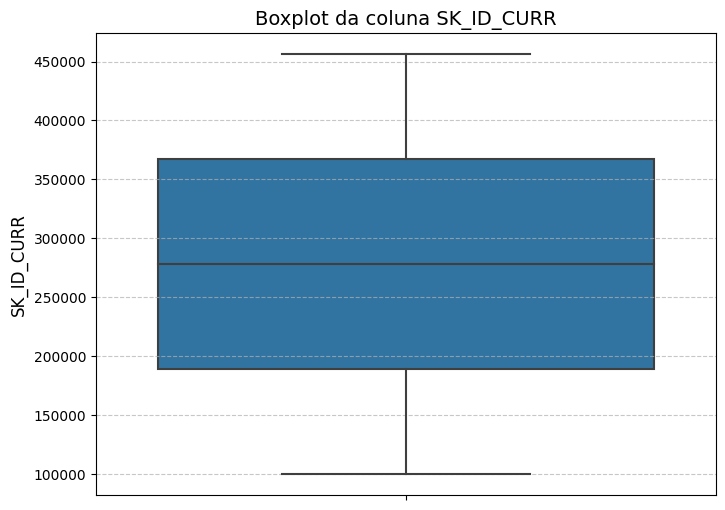

In [11]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df_application_train_cleaned["SK_ID_CURR"])
plt.title("Boxplot da coluna SK_ID_CURR", fontsize=14)
plt.ylabel("SK_ID_CURR", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

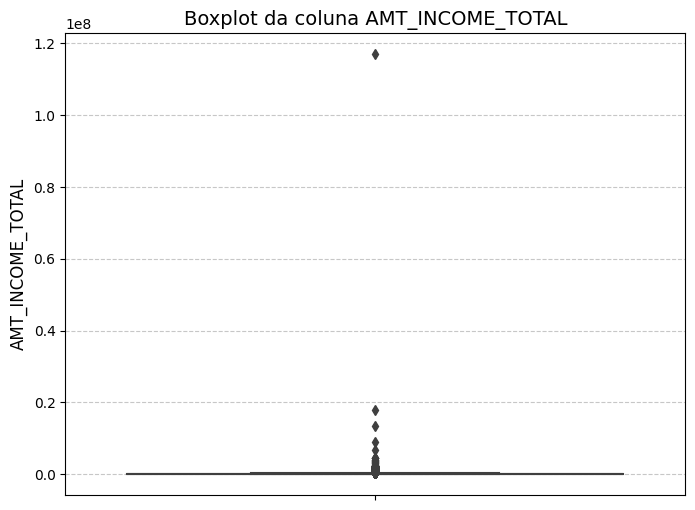

In [12]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df_application_train_cleaned["AMT_INCOME_TOTAL"])
plt.title("Boxplot da coluna AMT_INCOME_TOTAL", fontsize=14)
plt.ylabel("AMT_INCOME_TOTAL", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

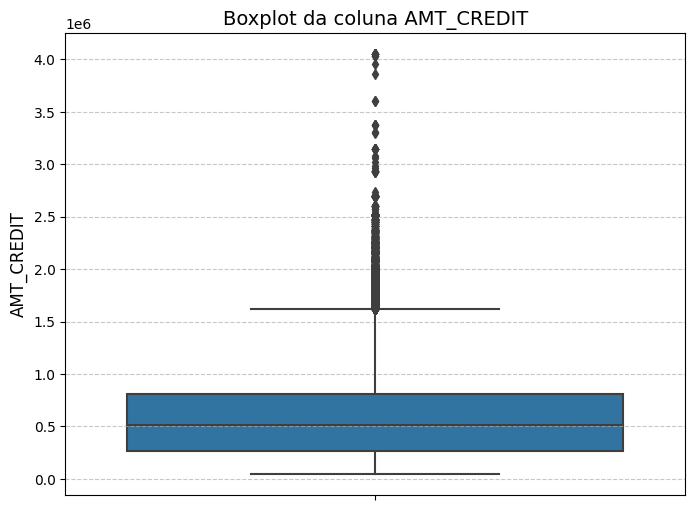

In [13]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df_application_train_cleaned["AMT_CREDIT"])
plt.title("Boxplot da coluna AMT_CREDIT", fontsize=14)
plt.ylabel("AMT_CREDIT", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

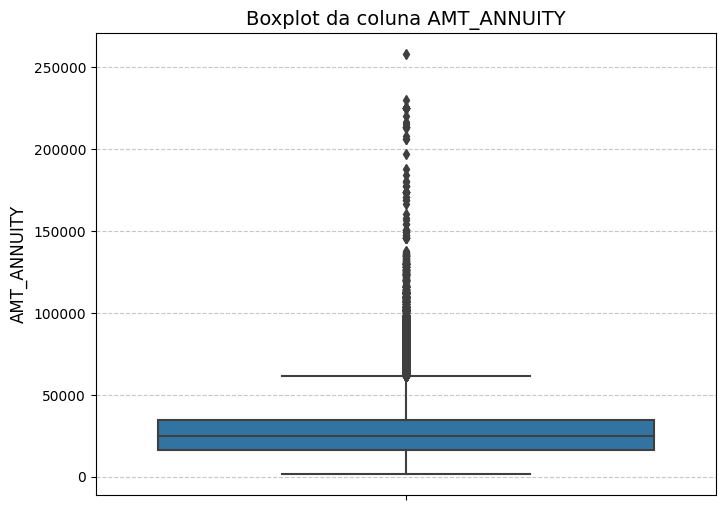

In [14]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df_application_train_cleaned["AMT_ANNUITY"])
plt.title("Boxplot da coluna AMT_ANNUITY", fontsize=14)
plt.ylabel("AMT_ANNUITY", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

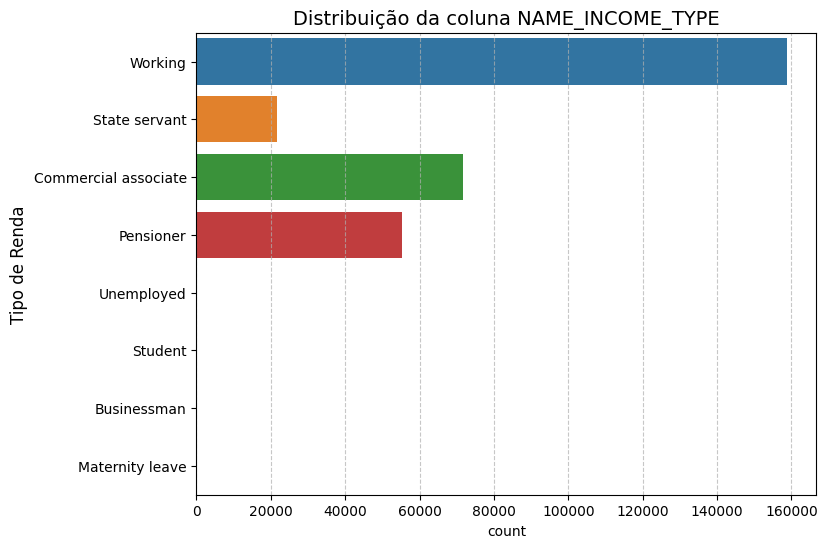

In [15]:
plt.figure(figsize=(8, 6))
sns.countplot(y=df_application_train_cleaned["NAME_INCOME_TYPE"])
plt.title("Distribuição da coluna NAME_INCOME_TYPE", fontsize=14)
plt.ylabel("Tipo de Renda", fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()


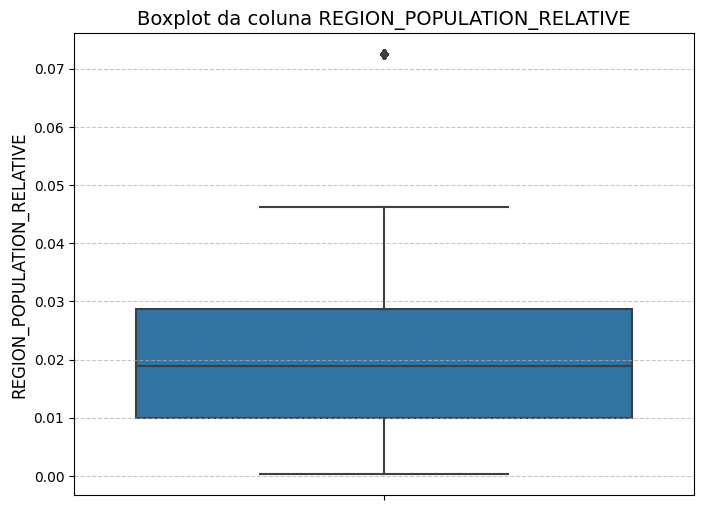

In [16]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df_application_train_cleaned["REGION_POPULATION_RELATIVE"])
plt.title("Boxplot da coluna REGION_POPULATION_RELATIVE", fontsize=14)
plt.ylabel("REGION_POPULATION_RELATIVE", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

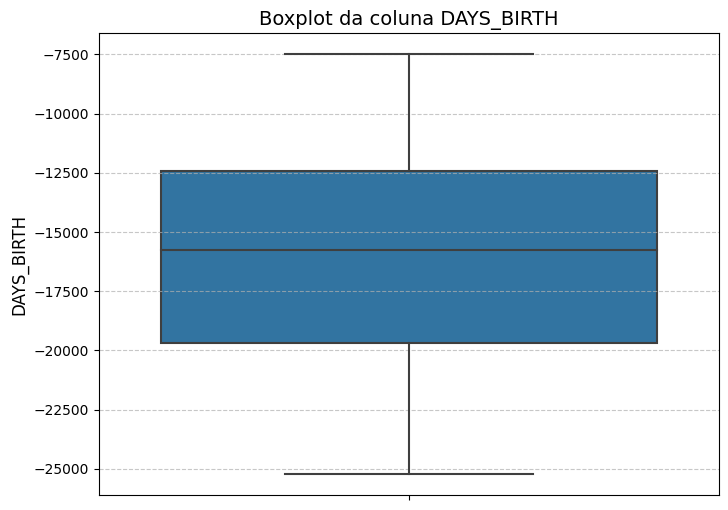

In [17]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df_application_train_cleaned["DAYS_BIRTH"])
plt.title("Boxplot da coluna DAYS_BIRTH", fontsize=14)
plt.ylabel("DAYS_BIRTH", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

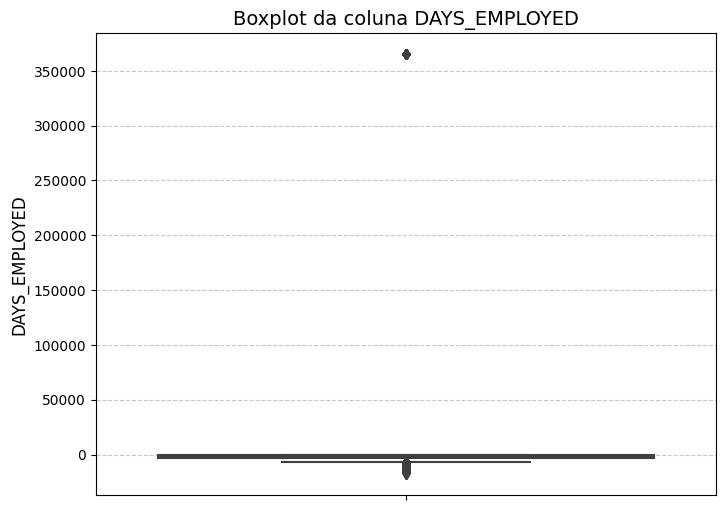

In [18]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df_application_train_cleaned["DAYS_EMPLOYED"])
plt.title("Boxplot da coluna DAYS_EMPLOYED", fontsize=14)
plt.ylabel("DAYS_EMPLOYED", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

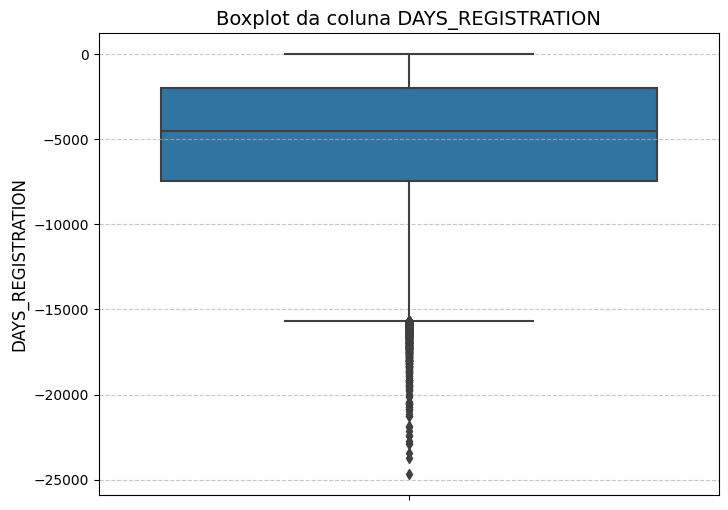

In [19]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df_application_train_cleaned["DAYS_REGISTRATION"])
plt.title("Boxplot da coluna DAYS_REGISTRATION", fontsize=14)
plt.ylabel("DAYS_REGISTRATION", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

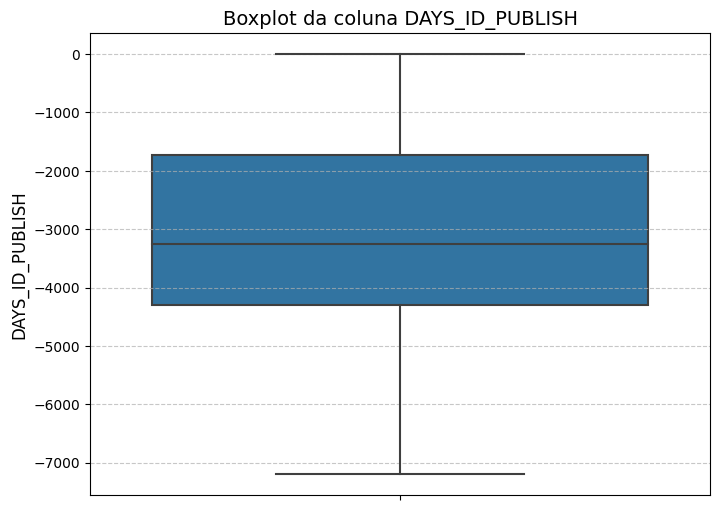

In [20]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df_application_train_cleaned["DAYS_ID_PUBLISH"])
plt.title("Boxplot da coluna DAYS_ID_PUBLISH", fontsize=14)
plt.ylabel("DAYS_ID_PUBLISH", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

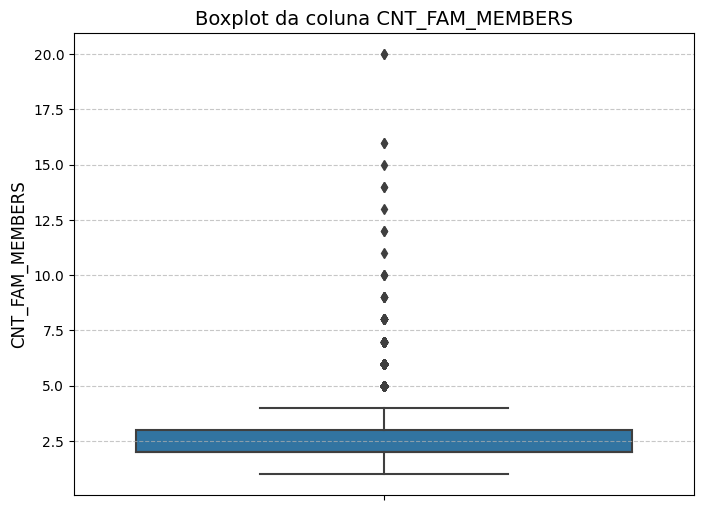

In [21]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df_application_train_cleaned["CNT_FAM_MEMBERS"])
plt.title("Boxplot da coluna CNT_FAM_MEMBERS", fontsize=14)
plt.ylabel("CNT_FAM_MEMBERS", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

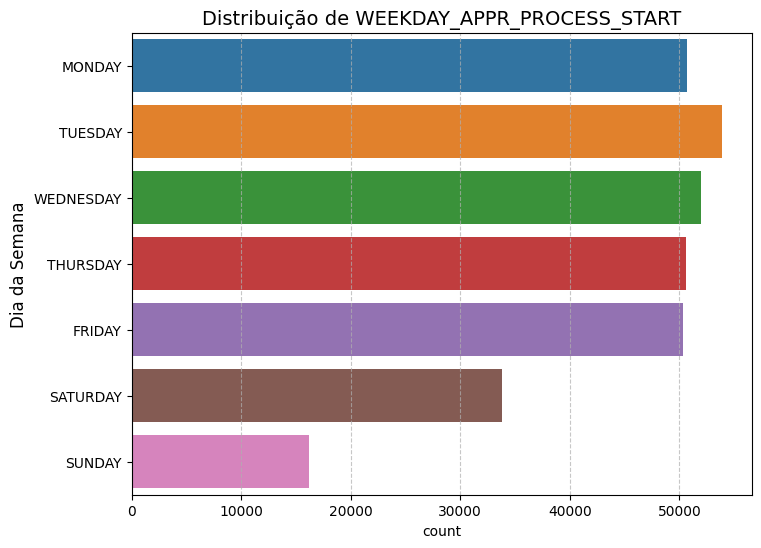

In [22]:
plt.figure(figsize=(8, 6))
sns.countplot(y=df_application_train_cleaned["WEEKDAY_APPR_PROCESS_START"], order=[
    "MONDAY", "TUESDAY", "WEDNESDAY", "THURSDAY", "FRIDAY", "SATURDAY", "SUNDAY"
])
plt.title("Distribuição de WEEKDAY_APPR_PROCESS_START", fontsize=14)
plt.ylabel("Dia da Semana", fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()


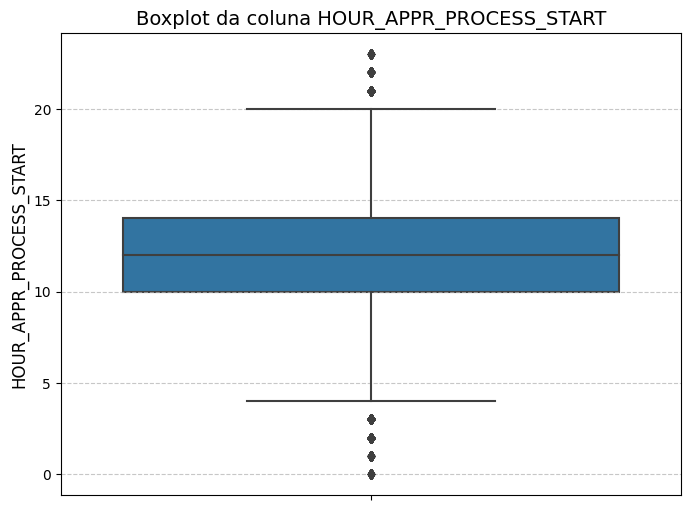

In [23]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df_application_train_cleaned["HOUR_APPR_PROCESS_START"])
plt.title("Boxplot da coluna HOUR_APPR_PROCESS_START", fontsize=14)
plt.ylabel("HOUR_APPR_PROCESS_START", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

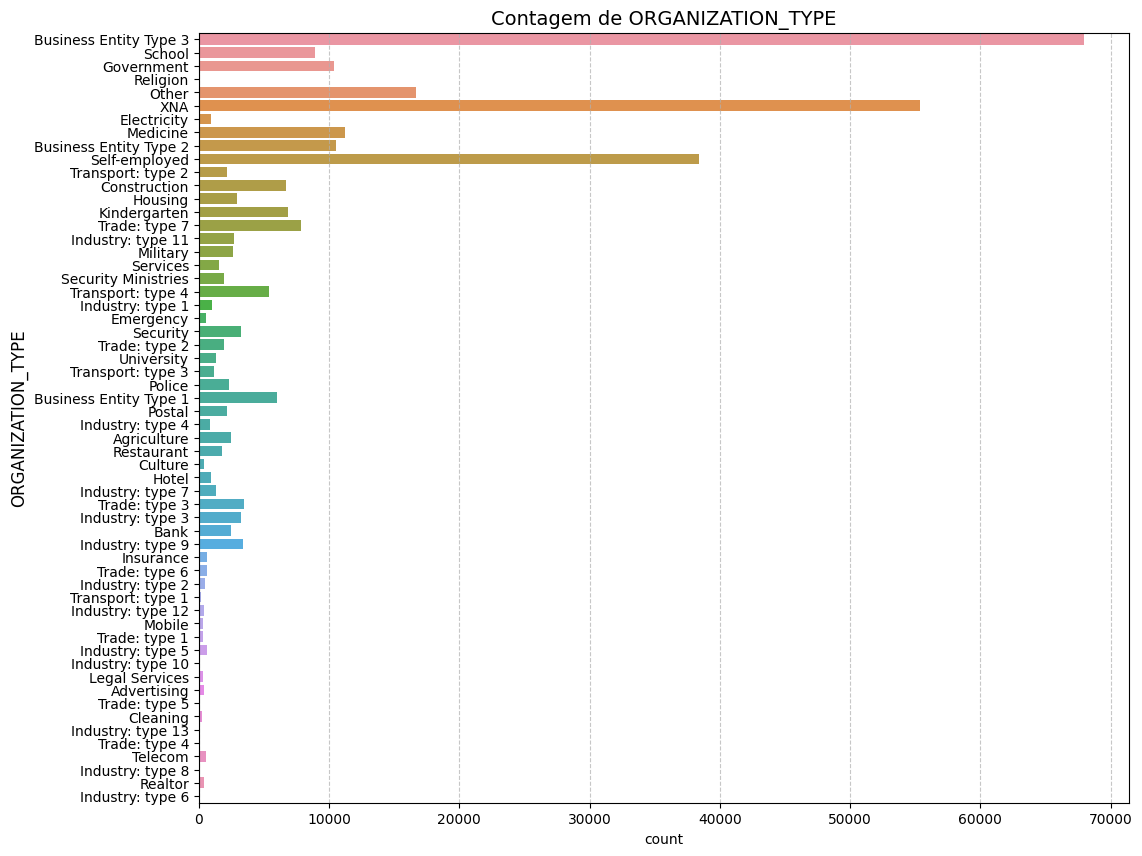

In [24]:
plt.figure(figsize=(12, 10))
sns.countplot(y=df_application_train_cleaned["ORGANIZATION_TYPE"])
plt.title("Contagem de ORGANIZATION_TYPE", fontsize=14)
plt.ylabel("ORGANIZATION_TYPE", fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()


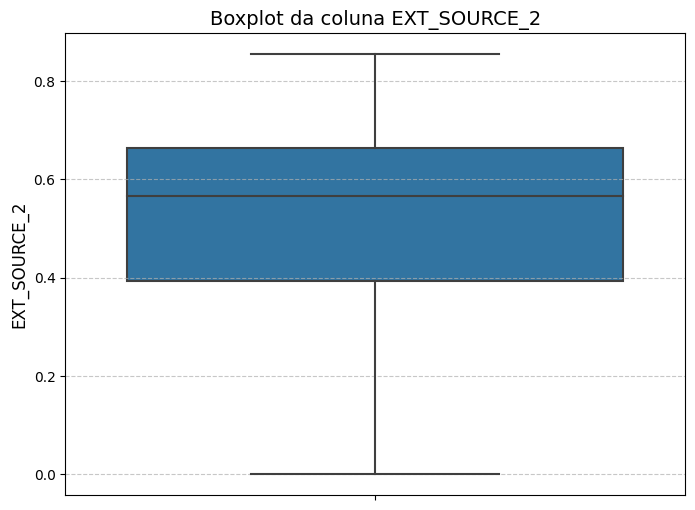

In [25]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df_application_train_cleaned["EXT_SOURCE_2"])
plt.title("Boxplot da coluna EXT_SOURCE_2", fontsize=14)
plt.ylabel("EXT_SOURCE_2", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

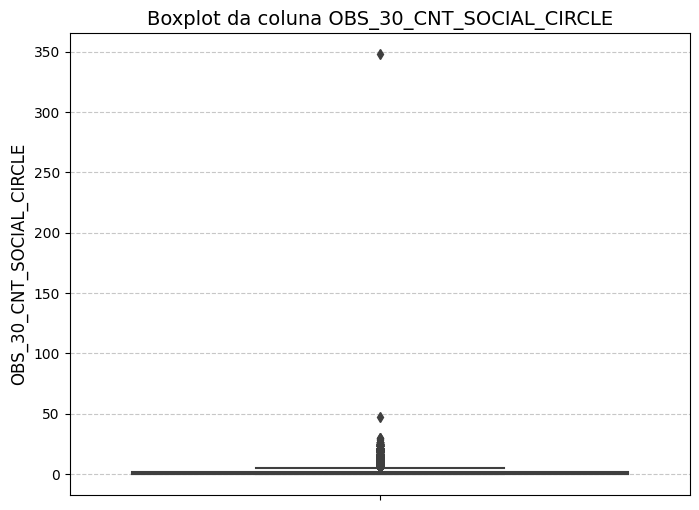

In [26]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df_application_train_cleaned["OBS_30_CNT_SOCIAL_CIRCLE"])
plt.title("Boxplot da coluna OBS_30_CNT_SOCIAL_CIRCLE", fontsize=14)
plt.ylabel("OBS_30_CNT_SOCIAL_CIRCLE", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

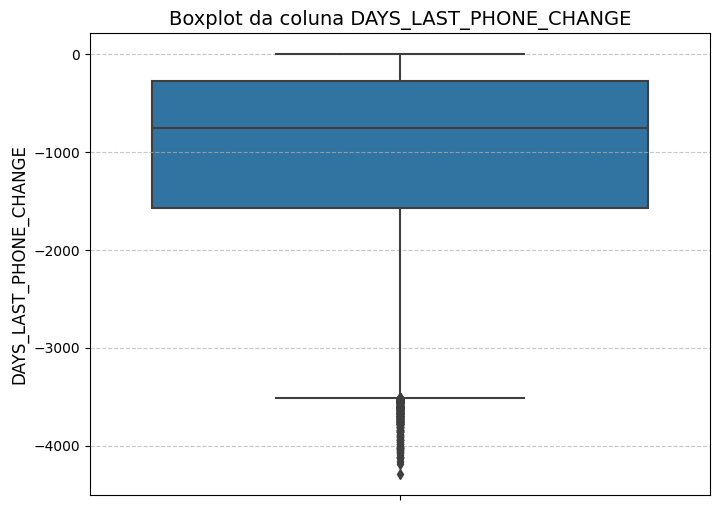

In [27]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df_application_train_cleaned["DAYS_LAST_PHONE_CHANGE"])
plt.title("Boxplot da coluna DAYS_LAST_PHONE_CHANGE", fontsize=14)
plt.ylabel("DAYS_LAST_PHONE_CHANGE", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

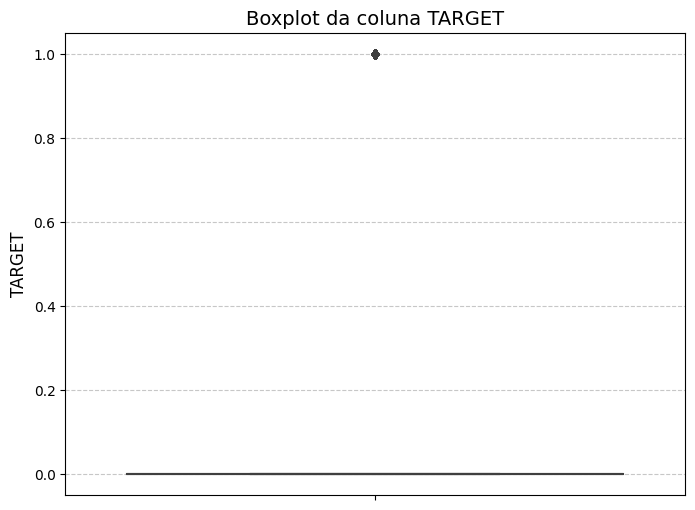

In [28]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df_application_train_cleaned["TARGET"])
plt.title("Boxplot da coluna TARGET", fontsize=14)
plt.ylabel("TARGET", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

## Removendo outliers

In [29]:
def remove_outliers_all(df, target_column):
    df_filtered = df.copy()

    for column in df_filtered.select_dtypes(include=['number']).columns:
        if column != target_column:  # Evita modificar a coluna target
            Q1 = df_filtered[column].quantile(0.25)
            Q3 = df_filtered[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            df_filtered = df_filtered[(df_filtered[column] >= lower_bound) & (df_filtered[column] <= upper_bound)]

    return df_filtered

In [30]:
df_application_train_cleaned = remove_outliers_all(df_application_train_cleaned, target_column="TARGET")


/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater_equal
  return op(a, b)
/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less_equal
  return op(a, b)
/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater_equal
  return op(a, b)
/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less_equal
  return op(a, b)
/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater_equal
  return op(a, b)
/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less_equal
  return op(a, b)
/usr/local/lib/python3.10/dist-packages/pandas/co

In [31]:
df_application_train_cleaned

,SK_ID_CURR,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_INCOME_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,ORGANIZATION_TYPE,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,TARGET
0,100002,202500.0,406597.5,24700.5,Working,0.018801,-9461,-637,-3648.0,-2120,1.0,WEDNESDAY,10,Business Entity Type 3,0.262949,2.0,-1134.0,1
1,100003,270000.0,1293502.5,35698.5,State servant,0.003541,-16765,-1188,-1186.0,-291,2.0,MONDAY,11,School,0.622246,1.0,-828.0,0
2,100004,67500.0,135000.0,6750.0,Working,0.010032,-19046,-225,-4260.0,-2531,1.0,MONDAY,9,Government,0.555912,0.0,-815.0,0
3,100006,135000.0,312682.5,29686.5,Working,0.008019,-19005,-3039,-9833.0,-2437,2.0,WEDNESDAY,17,Business Entity Type 3,0.650442,2.0,-617.0,0
4,100007,121500.0,513000.0,21865.5,Working,0.028663,-19932,-3038,-4311.0,-3458,1.0,THURSDAY,11,Religion,0.322738,0.0,-1106.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307497,456241,180000.0,270126.0,12028.5,Working,0.007020,-16679,-1222,-1916.0,-222,2.0,THURSDAY,13,Trade: type 7,0.651306,0.0,-1344.0,0
307500,456244,261000.0,1303812.0,35982.0,Working,0.031329,-20390,-5326,-157.0,-3906,2.0,FRIDAY,10,Business Entity Type 3,0.789389,0.0,-1459.0,0
307506,456251,157500.0,254700.0,27558.0,Working,0.032561,-9327,-236,-8456.0,-1982,1.0,THURSDAY,15,Services,0.681632,0.0,-273.0,0
307509,456254,171000.0,370107.0,20205.0,Commercial associate,0.005313,-11961,-4786,-2562.0,-931,2.0,WEDNESDAY,9,Business Entity Type 1,0.514163,0.0,-322.0,1


# Bureau csv



In [32]:
df_bureau = pd.read_csv("/kaggle/input/credit-aws/bureau.csv")

# EDA

In [33]:
df_bureau

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.00,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.00,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.50,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.00,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.00,NaN,NaN,0.0,Consumer credit,-21,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1716423,259355,5057750,Active,currency 1,-44,0,-30.0,NaN,0.0,0,11250.00,11250.0,0.0,0.0,Microloan,-19,NaN
1716424,100044,5057754,Closed,currency 1,-2648,0,-2433.0,-2493.0,5476.5,0,38130.84,0.0,0.0,0.0,Consumer credit,-2493,NaN
1716425,100044,5057762,Closed,currency 1,-1809,0,-1628.0,-970.0,NaN,0,15570.00,NaN,NaN,0.0,Consumer credit,-967,NaN
1716426,246829,5057770,Closed,currency 1,-1878,0,-1513.0,-1513.0,NaN,0,36000.00,0.0,0.0,0.0,Consumer credit,-1508,NaN


In [34]:
df_bureau.info

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


<bound method DataFrame.info of          SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
0            215354       5714462        Closed      currency 1         -497   
1            215354       5714463        Active      currency 1         -208   
2            215354       5714464        Active      currency 1         -203   
3            215354       5714465        Active      currency 1         -203   
4            215354       5714466        Active      currency 1         -629   
...             ...           ...           ...             ...          ...   
1716423      259355       5057750        Active      currency 1          -44   
1716424      100044       5057754        Closed      currency 1        -2648   
1716425      100044       5057762        Closed      currency 1        -1809   
1716426      246829       5057770        Closed      currency 1        -1878   
1716427      246829       5057778        Closed      currency 1         -463   

       

In [35]:
# Aplicação do pipeline no df_bureau
df_bureau_cleaned = df_bureau.copy()
df_bureau_cleaned = remove_high_null_columns(df_bureau_cleaned, threshold=0.1)
df_bureau_cleaned = remove_unbalanced_columns(df_bureau_cleaned, threshold=0.60)
df_bureau_cleaned = remove_highly_correlated(df_bureau_cleaned, threshold=0.80)


/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)


In [36]:
df_bureau_cleaned

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,SK_ID_CURR,SK_ID_BUREAU,DAYS_CREDIT,DAYS_CREDIT_ENDDATE,AMT_CREDIT_SUM,DAYS_CREDIT_UPDATE
0,215354,5714462,-497,-153.0,91323.00,-131
1,215354,5714463,-208,1075.0,225000.00,-20
2,215354,5714464,-203,528.0,464323.50,-16
3,215354,5714465,-203,NaN,90000.00,-16
4,215354,5714466,-629,1197.0,2700000.00,-21
...,...,...,...,...,...,...
1716423,259355,5057750,-44,-30.0,11250.00,-19
1716424,100044,5057754,-2648,-2433.0,38130.84,-2493
1716425,100044,5057762,-1809,-1628.0,15570.00,-967
1716426,246829,5057770,-1878,-1513.0,36000.00,-1508


In [37]:
df_bureau_cleaned.duplicated().sum()

0

In [38]:
df_bureau_cleaned.isna().sum()

SK_ID_CURR                  0
SK_ID_BUREAU                0
DAYS_CREDIT                 0
DAYS_CREDIT_ENDDATE    105553
AMT_CREDIT_SUM             13
DAYS_CREDIT_UPDATE          0
dtype: int64

## Explorando outliers

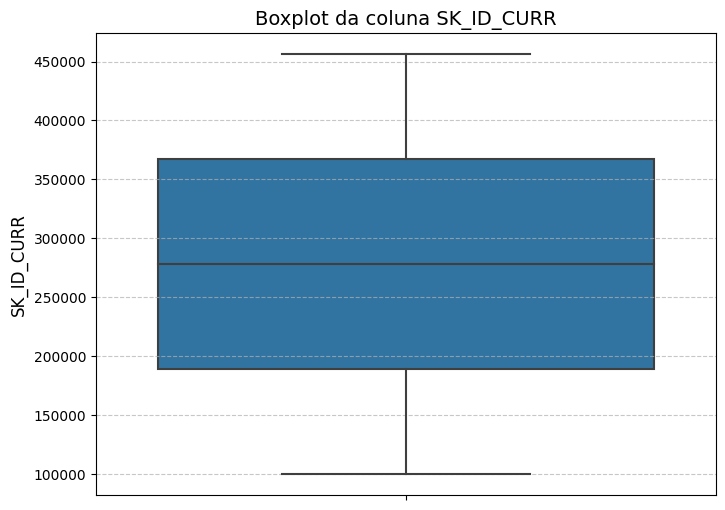

In [39]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df_bureau_cleaned["SK_ID_CURR"])
plt.title("Boxplot da coluna SK_ID_CURR", fontsize=14)
plt.ylabel("SK_ID_CURR", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

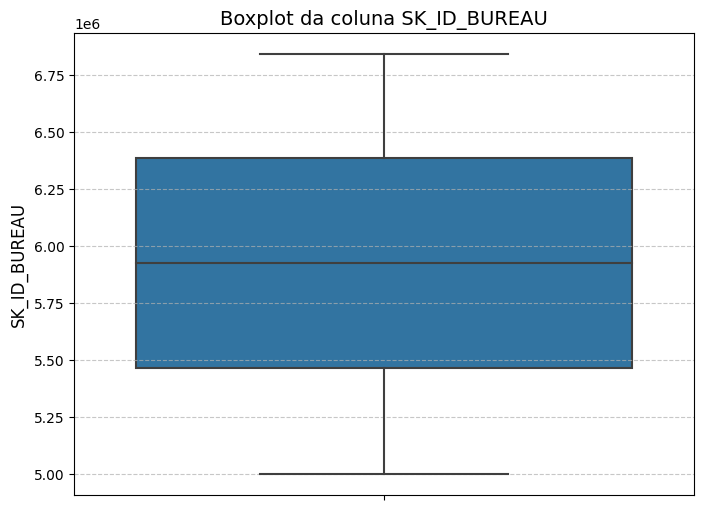

In [40]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df_bureau_cleaned["SK_ID_BUREAU"])
plt.title("Boxplot da coluna SK_ID_BUREAU", fontsize=14)
plt.ylabel("SK_ID_BUREAU", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

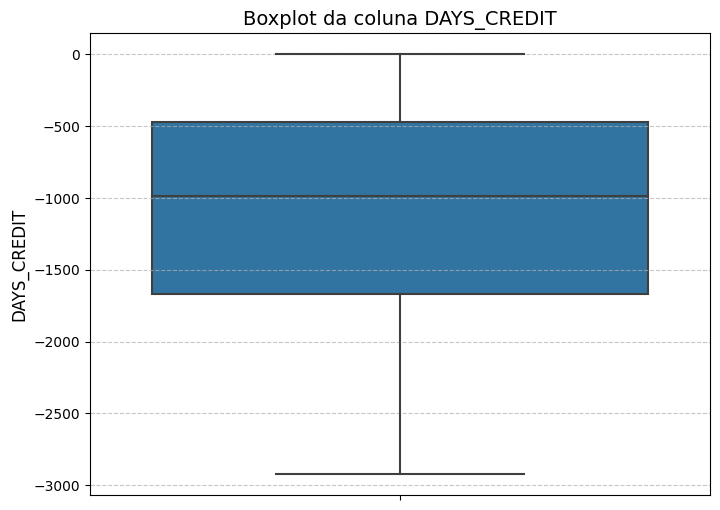

In [41]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df_bureau_cleaned["DAYS_CREDIT"])
plt.title("Boxplot da coluna DAYS_CREDIT", fontsize=14)
plt.ylabel("DAYS_CREDIT", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

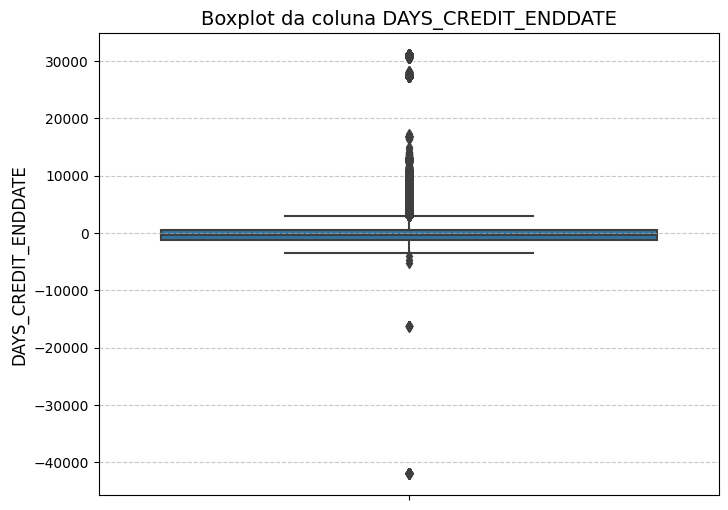

In [42]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df_bureau_cleaned["DAYS_CREDIT_ENDDATE"])
plt.title("Boxplot da coluna DAYS_CREDIT_ENDDATE", fontsize=14)
plt.ylabel("DAYS_CREDIT_ENDDATE", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

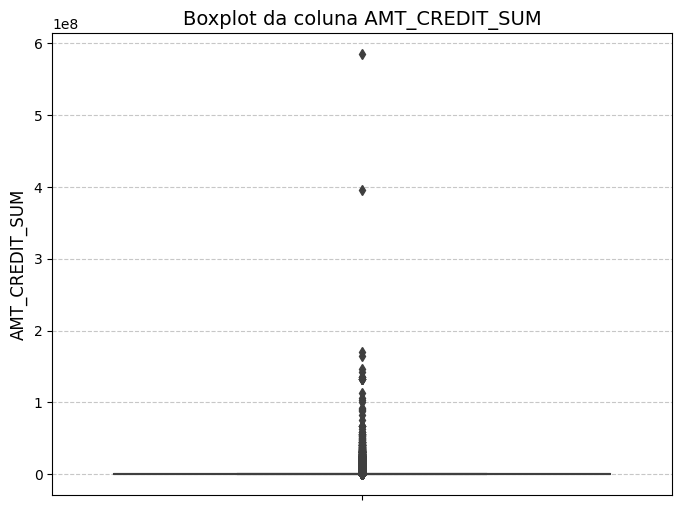

In [43]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df_bureau_cleaned["AMT_CREDIT_SUM"])
plt.title("Boxplot da coluna AMT_CREDIT_SUM", fontsize=14)
plt.ylabel("AMT_CREDIT_SUM", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

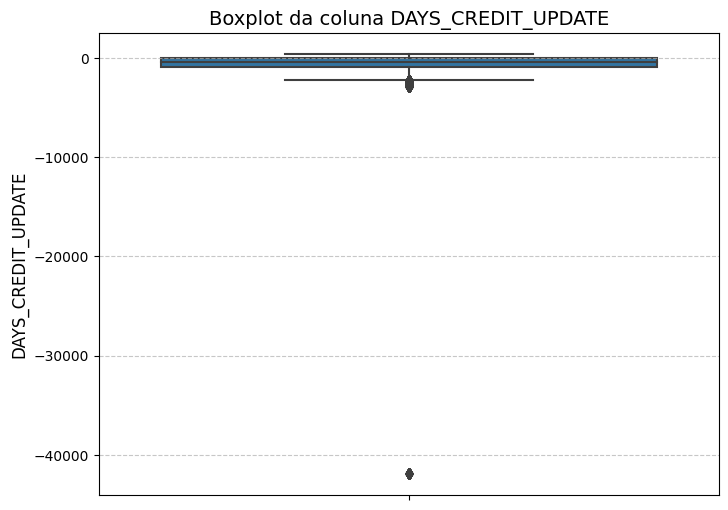

In [44]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df_bureau_cleaned["DAYS_CREDIT_UPDATE"])
plt.title("Boxplot da coluna DAYS_CREDIT_UPDATE", fontsize=14)
plt.ylabel("DAYS_CREDIT_UPDATE", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

## retirando outliers

In [45]:
df_bureau_cleaned = remove_outliers_all(df_bureau_cleaned, target_column="TARGET")

## Correlacao

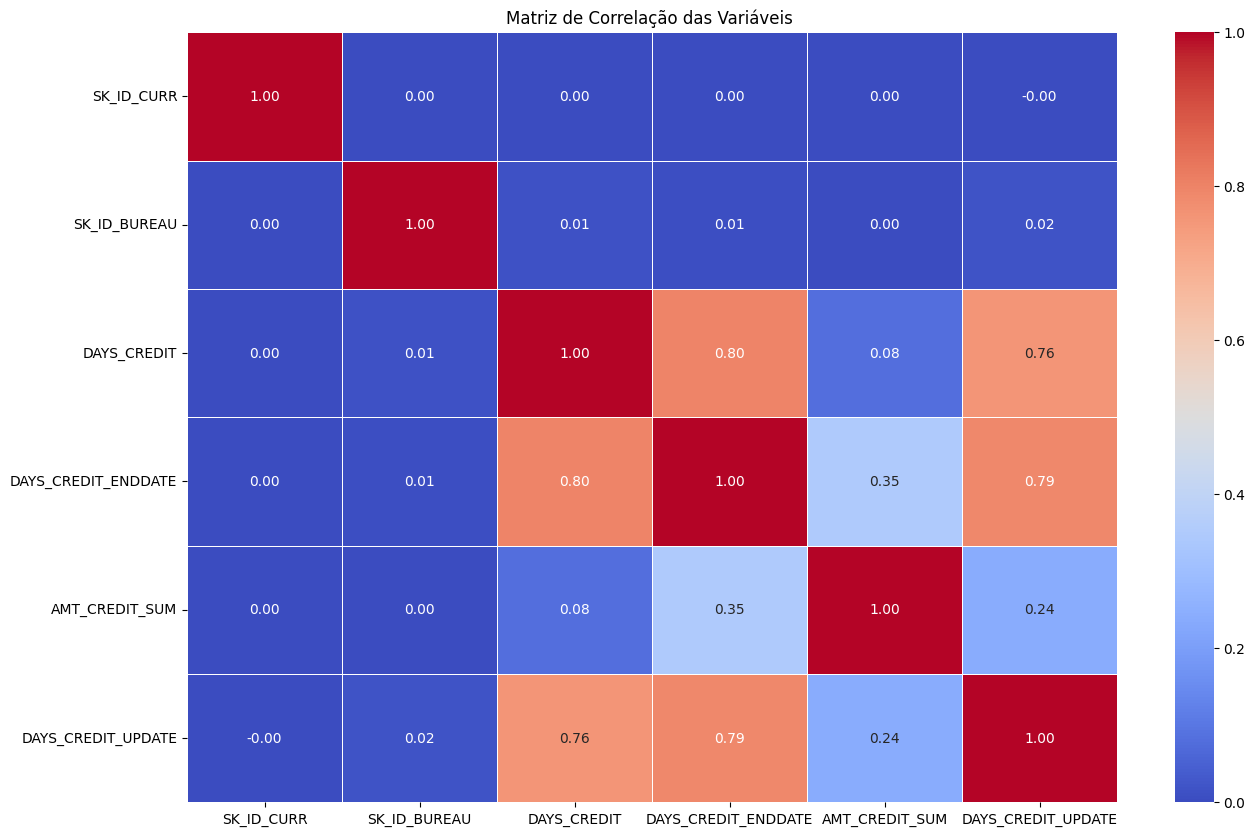

In [46]:
correlation_matrix = df_bureau_cleaned.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Matriz de Correlação das Variáveis ")
plt.show()

## Previos aplication

In [47]:
df_previous_application = pd.read_csv("/kaggle/input/credit-aws/previous_application.csv")

# EDA

In [48]:
df_previous_application

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pan

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670209,2300464,352015,Consumer loans,14704.290,267295.5,311400.0,0.0,267295.5,WEDNESDAY,12,...,Furniture,30.0,low_normal,POS industry with interest,365243.0,-508.0,362.0,-358.0,-351.0,0.0
1670210,2357031,334635,Consumer loans,6622.020,87750.0,64291.5,29250.0,87750.0,TUESDAY,15,...,Furniture,12.0,middle,POS industry with interest,365243.0,-1604.0,-1274.0,-1304.0,-1297.0,0.0
1670211,2659632,249544,Consumer loans,11520.855,105237.0,102523.5,10525.5,105237.0,MONDAY,12,...,Consumer electronics,10.0,low_normal,POS household with interest,365243.0,-1457.0,-1187.0,-1187.0,-1181.0,0.0
1670212,2785582,400317,Cash loans,18821.520,180000.0,191880.0,NaN,180000.0,WEDNESDAY,9,...,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-1155.0,-825.0,-825.0,-817.0,1.0


In [49]:
df_previous_application.info

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


<bound method DataFrame.info of          SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  \
0           2030495      271877     Consumer loans     1730.430   
1           2802425      108129         Cash loans    25188.615   
2           2523466      122040         Cash loans    15060.735   
3           2819243      176158         Cash loans    47041.335   
4           1784265      202054         Cash loans    31924.395   
...             ...         ...                ...          ...   
1670209     2300464      352015     Consumer loans    14704.290   
1670210     2357031      334635     Consumer loans     6622.020   
1670211     2659632      249544     Consumer loans    11520.855   
1670212     2785582      400317         Cash loans    18821.520   
1670213     2418762      261212         Cash loans    16431.300   

         AMT_APPLICATION  AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
0                17145.0     17145.0               0.0          17145.0   
1            

In [50]:
df_previous_application.duplicated().sum()

0

In [51]:
df_previous_application.isna().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [52]:
# Aplicação do pipeline no df_previous
df_previous_application_cleaned = df_previous_application.copy()
df_previous_application_cleaned = remove_high_null_columns(df_previous_application_cleaned, threshold=0.1)
df_previous_applicationu_cleaned = remove_unbalanced_columns(df_previous_application_cleaned, threshold=0.60)
df_previous_application_cleaned = remove_highly_correlated(df_previous_application_cleaned, threshold=0.80)

/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)


In [53]:
df_previous_application_cleaned

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_APPLICATION,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,...,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,2030495,271877,Consumer loans,17145.0,SATURDAY,15,Y,1,XAP,Approved,...,XAP,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,middle,POS mobile with interest
1,2802425,108129,Cash loans,607500.0,THURSDAY,11,Y,1,XNA,Approved,...,XAP,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,low_action,Cash X-Sell: low
2,2523466,122040,Cash loans,112500.0,TUESDAY,11,Y,1,XNA,Approved,...,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,high,Cash X-Sell: high
3,2819243,176158,Cash loans,450000.0,MONDAY,7,Y,1,XNA,Approved,...,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,middle,Cash X-Sell: middle
4,1784265,202054,Cash loans,337500.0,THURSDAY,9,Y,1,Repairs,Refused,...,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,high,Cash Street: high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670209,2300464,352015,Consumer loans,267295.5,WEDNESDAY,12,Y,1,XAP,Approved,...,XAP,Refreshed,Furniture,POS,XNA,Stone,43,Furniture,low_normal,POS industry with interest
1670210,2357031,334635,Consumer loans,87750.0,TUESDAY,15,Y,1,XAP,Approved,...,XAP,New,Furniture,POS,XNA,Stone,43,Furniture,middle,POS industry with interest
1670211,2659632,249544,Consumer loans,105237.0,MONDAY,12,Y,1,XAP,Approved,...,XAP,Repeater,Consumer Electronics,POS,XNA,Country-wide,1370,Consumer electronics,low_normal,POS household with interest
1670212,2785582,400317,Cash loans,180000.0,WEDNESDAY,9,Y,1,XNA,Approved,...,XAP,Repeater,XNA,Cash,x-sell,AP+ (Cash loan),-1,XNA,low_normal,Cash X-Sell: low


In [54]:
df_previous_application_cleaned.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_APPLICATION',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION'],
      dtype='object')

## analise de outliers

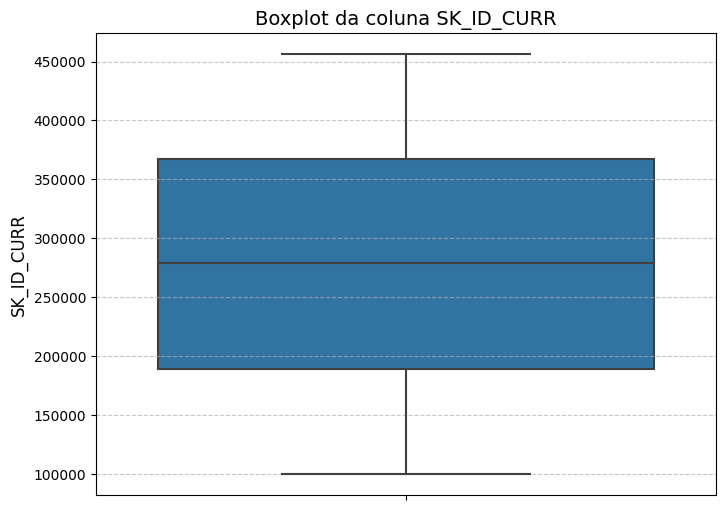

In [55]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df_previous_application_cleaned["SK_ID_CURR"])
plt.title("Boxplot da coluna SK_ID_CURR", fontsize=14)
plt.ylabel("SK_ID_CURR", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

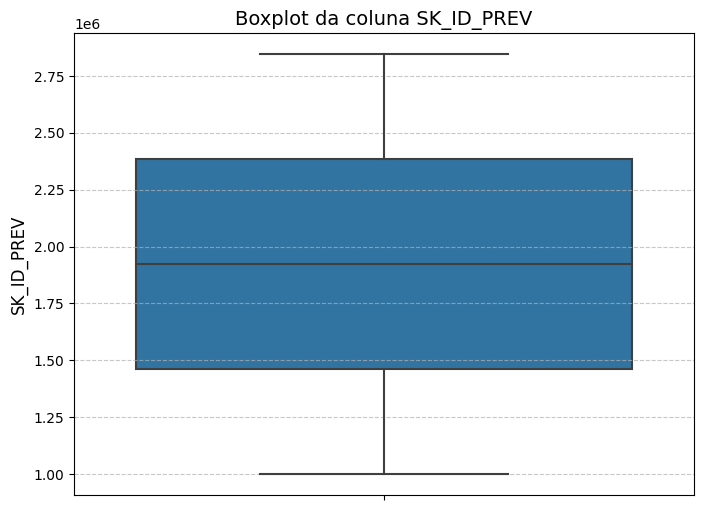

In [56]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df_previous_application_cleaned["SK_ID_PREV"])
plt.title("Boxplot da coluna SK_ID_PREV", fontsize=14)
plt.ylabel("SK_ID_PREV", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

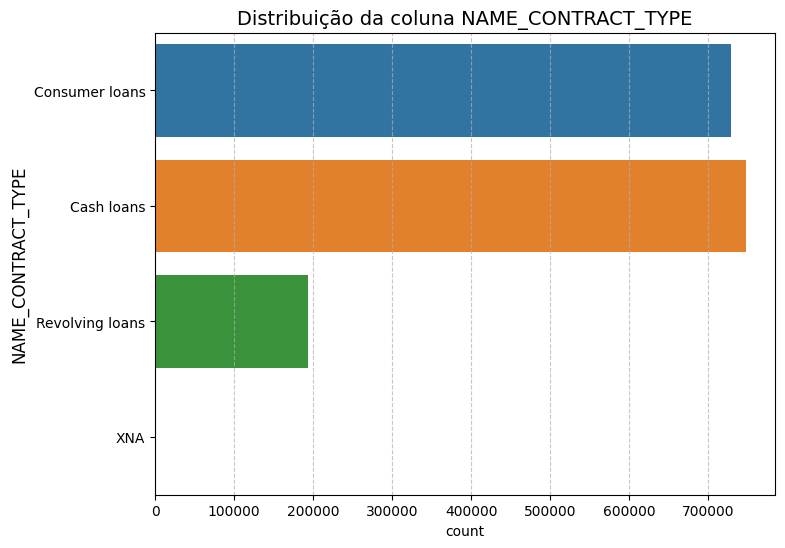

In [57]:
plt.figure(figsize=(8, 6))
sns.countplot(y=df_previous_application_cleaned["NAME_CONTRACT_TYPE"])
plt.title("Distribuição da coluna NAME_CONTRACT_TYPE", fontsize=14)
plt.ylabel("NAME_CONTRACT_TYPE", fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()


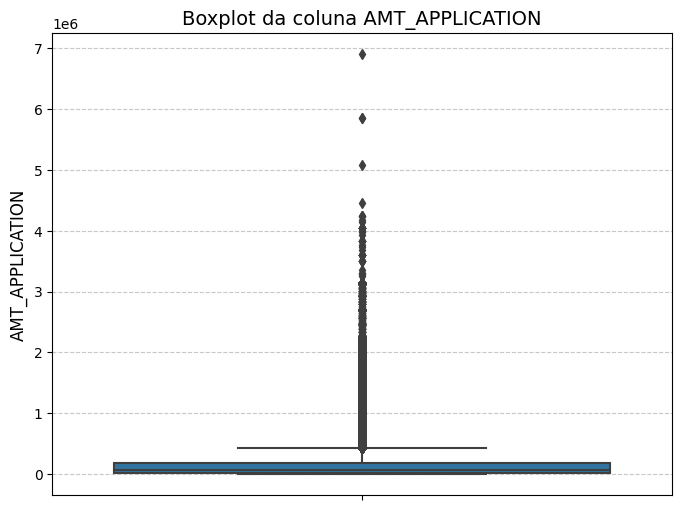

In [58]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df_previous_application_cleaned["AMT_APPLICATION"])
plt.title("Boxplot da coluna AMT_APPLICATION", fontsize=14)
plt.ylabel("AMT_APPLICATION", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

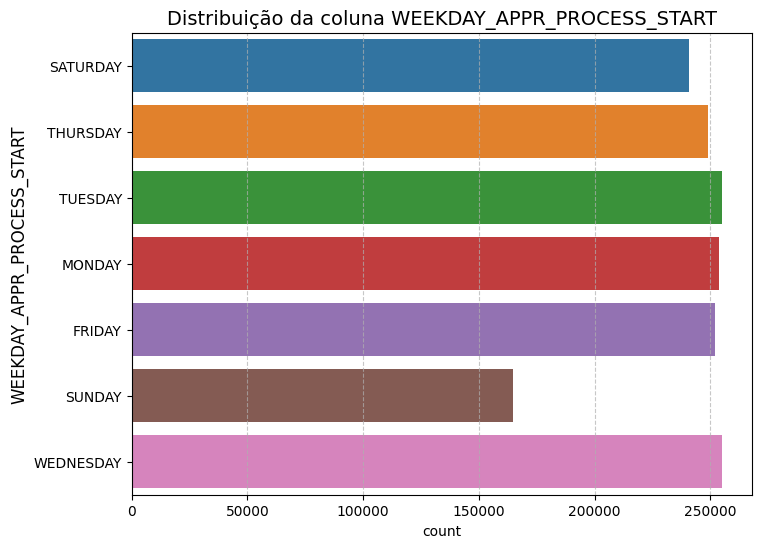

In [59]:
plt.figure(figsize=(8, 6))
sns.countplot(y=df_previous_application_cleaned["WEEKDAY_APPR_PROCESS_START"])
plt.title("Distribuição da coluna WEEKDAY_APPR_PROCESS_START", fontsize=14)
plt.ylabel("WEEKDAY_APPR_PROCESS_START", fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

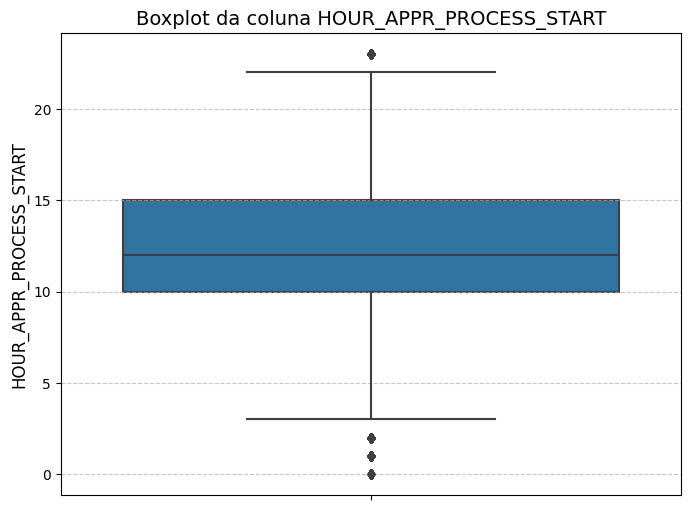

In [60]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df_previous_application_cleaned["HOUR_APPR_PROCESS_START"])
plt.title("Boxplot da coluna HOUR_APPR_PROCESS_START", fontsize=14)
plt.ylabel("HOUR_APPR_PROCESS_START", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

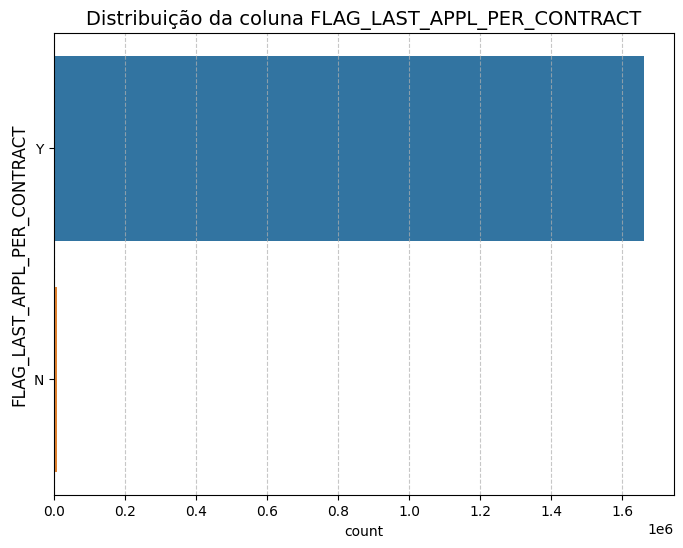

In [61]:
plt.figure(figsize=(8, 6))
sns.countplot(y=df_previous_application_cleaned["FLAG_LAST_APPL_PER_CONTRACT"])
plt.title("Distribuição da coluna FLAG_LAST_APPL_PER_CONTRACT", fontsize=14)
plt.ylabel("FLAG_LAST_APPL_PER_CONTRACT", fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

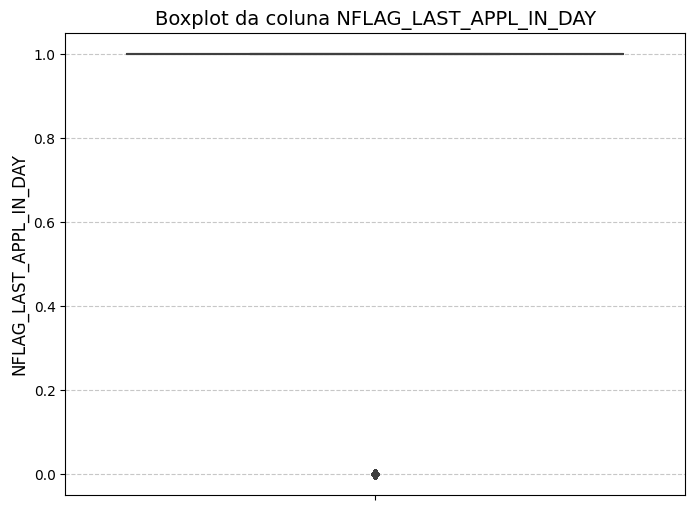

In [62]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df_previous_application_cleaned["NFLAG_LAST_APPL_IN_DAY"])
plt.title("Boxplot da coluna NFLAG_LAST_APPL_IN_DAY", fontsize=14)
plt.ylabel("NFLAG_LAST_APPL_IN_DAY", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

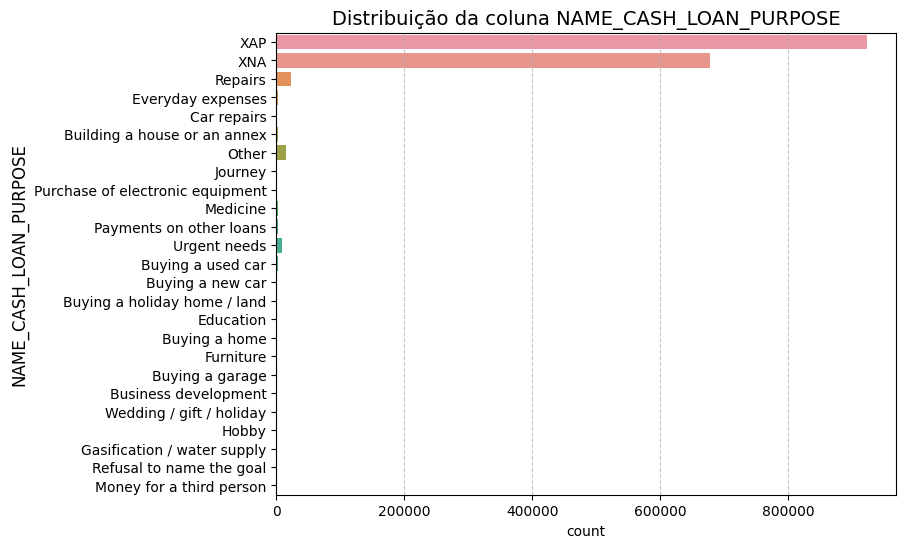

In [63]:
plt.figure(figsize=(8, 6))
sns.countplot(y=df_previous_application_cleaned["NAME_CASH_LOAN_PURPOSE"])
plt.title("Distribuição da coluna NAME_CASH_LOAN_PURPOSE", fontsize=14)
plt.ylabel("NAME_CASH_LOAN_PURPOSE", fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

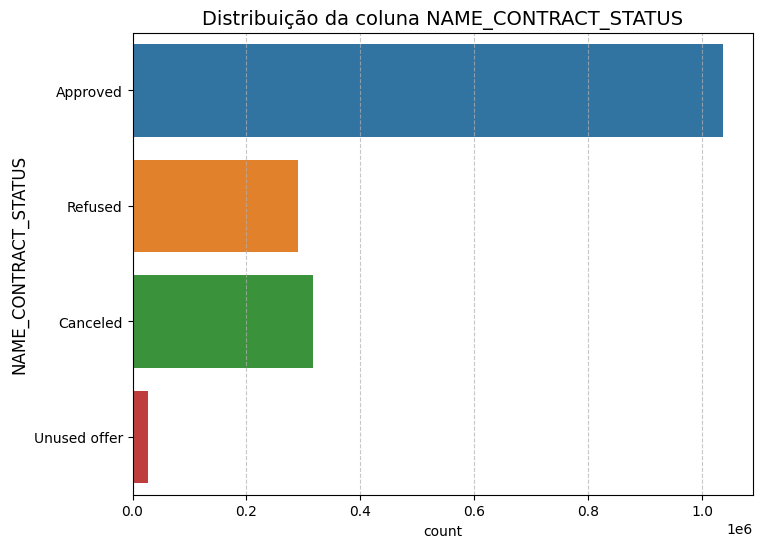

In [64]:
plt.figure(figsize=(8, 6))
sns.countplot(y=df_previous_application_cleaned["NAME_CONTRACT_STATUS"])
plt.title("Distribuição da coluna NAME_CONTRACT_STATUS", fontsize=14)
plt.ylabel("NAME_CONTRACT_STATUS", fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

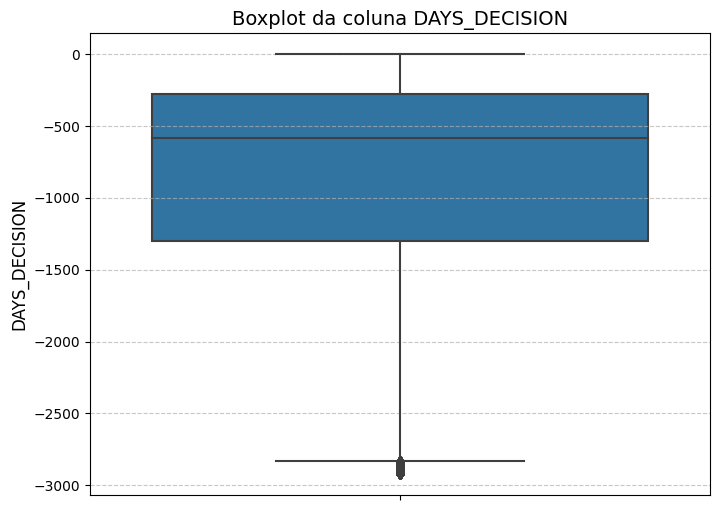

In [65]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df_previous_application_cleaned["DAYS_DECISION"])
plt.title("Boxplot da coluna DAYS_DECISION", fontsize=14)
plt.ylabel("DAYS_DECISION", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

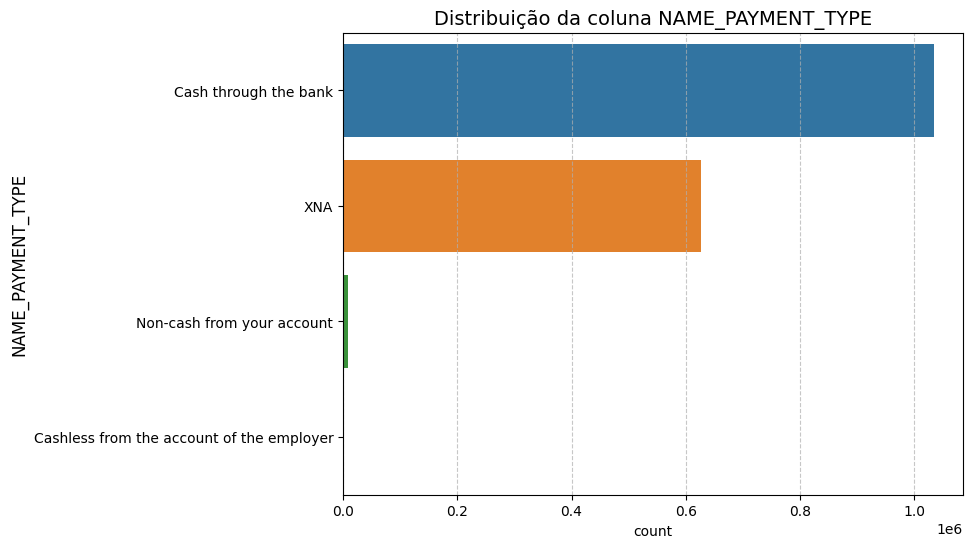

In [66]:
plt.figure(figsize=(8, 6))
sns.countplot(y=df_previous_application_cleaned["NAME_PAYMENT_TYPE"])
plt.title("Distribuição da coluna NAME_PAYMENT_TYPE", fontsize=14)
plt.ylabel("NAME_PAYMENT_TYPE", fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

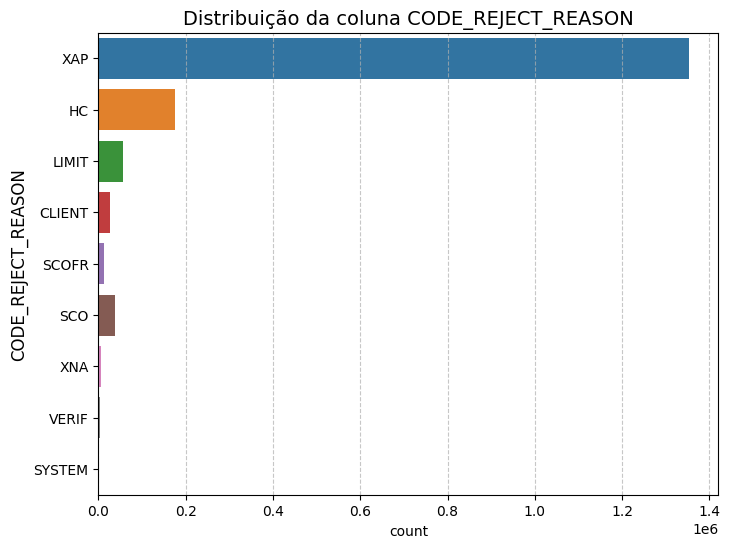

In [67]:
plt.figure(figsize=(8, 6))
sns.countplot(y=df_previous_application_cleaned["CODE_REJECT_REASON"])
plt.title("Distribuição da coluna CODE_REJECT_REASON", fontsize=14)
plt.ylabel("CODE_REJECT_REASON", fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

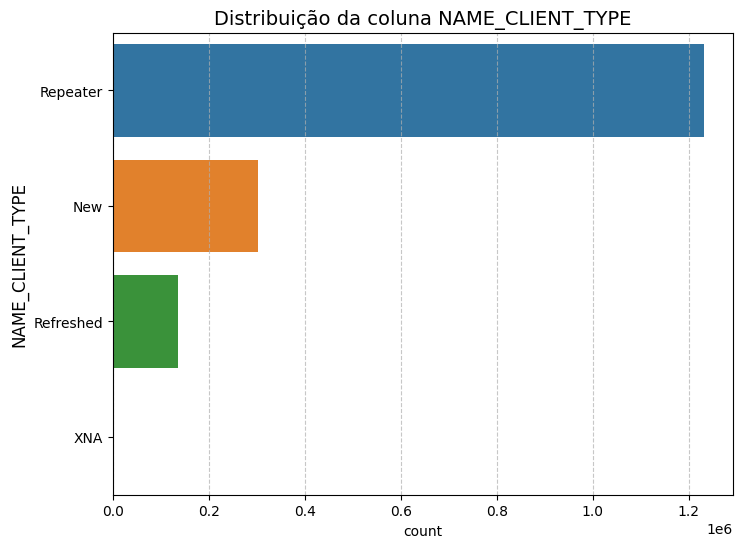

In [68]:
plt.figure(figsize=(8, 6))
sns.countplot(y=df_previous_application_cleaned["NAME_CLIENT_TYPE"])
plt.title("Distribuição da coluna NAME_CLIENT_TYPE", fontsize=14)
plt.ylabel("NAME_CLIENT_TYPE", fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

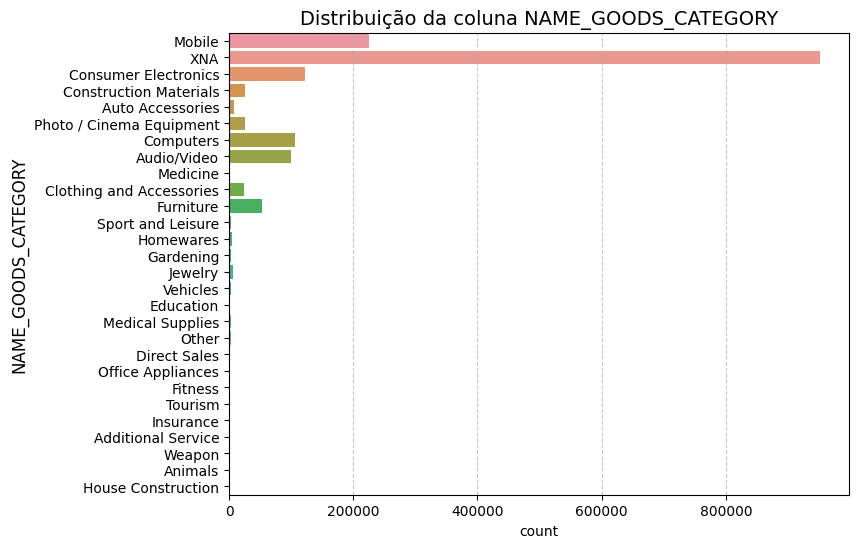

In [69]:
plt.figure(figsize=(8, 6))
sns.countplot(y=df_previous_application_cleaned["NAME_GOODS_CATEGORY"])
plt.title("Distribuição da coluna NAME_GOODS_CATEGORY", fontsize=14)
plt.ylabel("NAME_GOODS_CATEGORY", fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

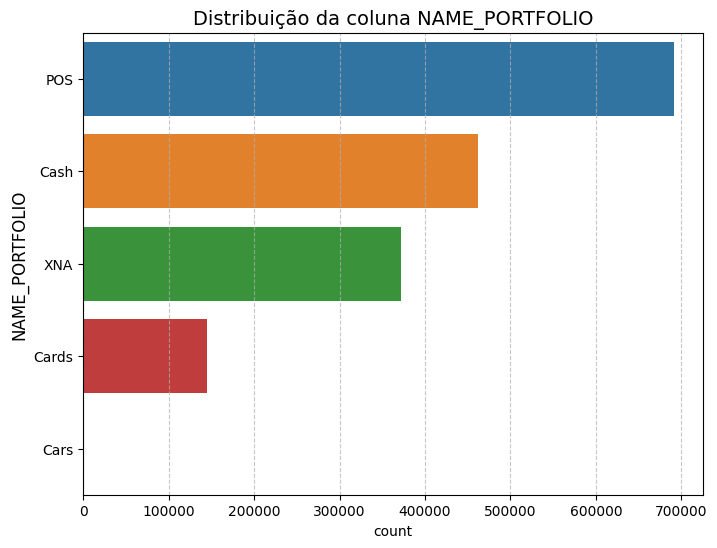

In [70]:
plt.figure(figsize=(8, 6))
sns.countplot(y=df_previous_application_cleaned["NAME_PORTFOLIO"])
plt.title("Distribuição da coluna NAME_PORTFOLIO", fontsize=14)
plt.ylabel("NAME_PORTFOLIO", fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

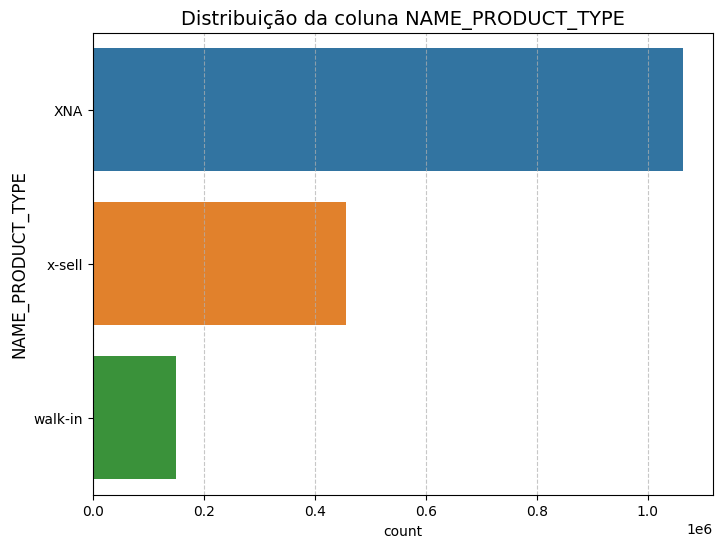

In [71]:
plt.figure(figsize=(8, 6))
sns.countplot(y=df_previous_application_cleaned["NAME_PRODUCT_TYPE"])
plt.title("Distribuição da coluna NAME_PRODUCT_TYPE", fontsize=14)
plt.ylabel("NAME_PRODUCT_TYPE", fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

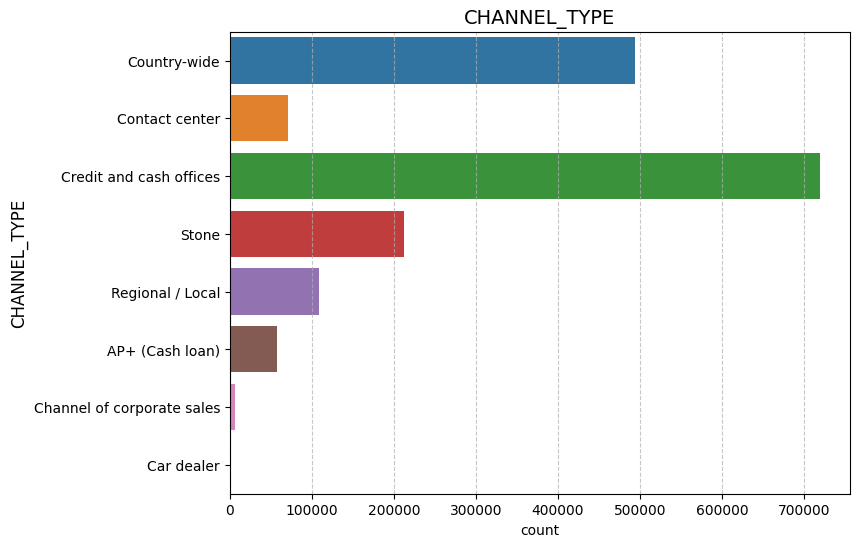

In [72]:
plt.figure(figsize=(8, 6))
sns.countplot(y=df_previous_application_cleaned["CHANNEL_TYPE"])
plt.title("CHANNEL_TYPE", fontsize=14)
plt.ylabel("CHANNEL_TYPE", fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

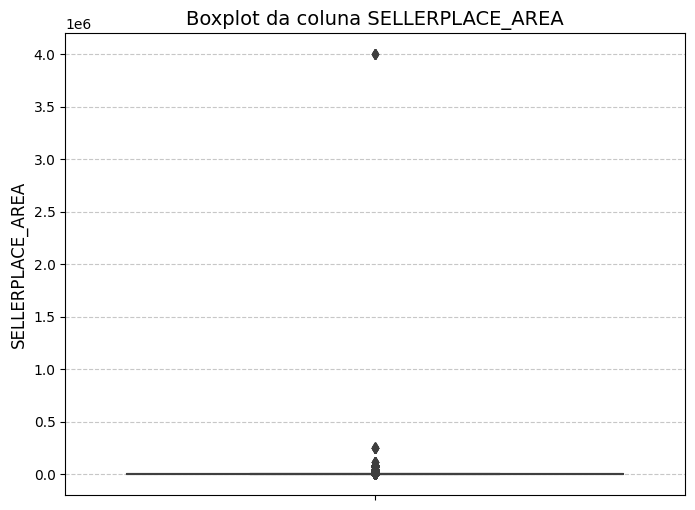

In [73]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df_previous_application_cleaned["SELLERPLACE_AREA"])
plt.title("Boxplot da coluna SELLERPLACE_AREA", fontsize=14)
plt.ylabel("SELLERPLACE_AREA", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

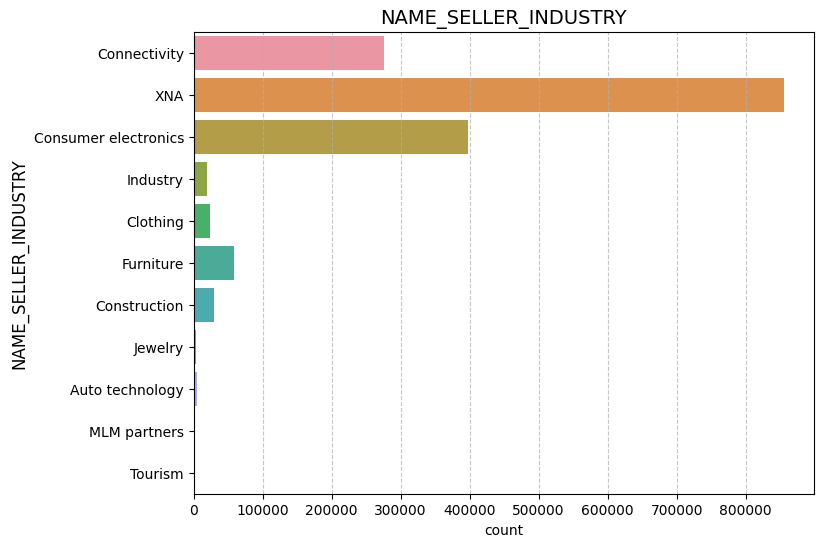

In [74]:
plt.figure(figsize=(8, 6))
sns.countplot(y=df_previous_application_cleaned["NAME_SELLER_INDUSTRY"])
plt.title("NAME_SELLER_INDUSTRY", fontsize=14)
plt.ylabel("NAME_SELLER_INDUSTRY", fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

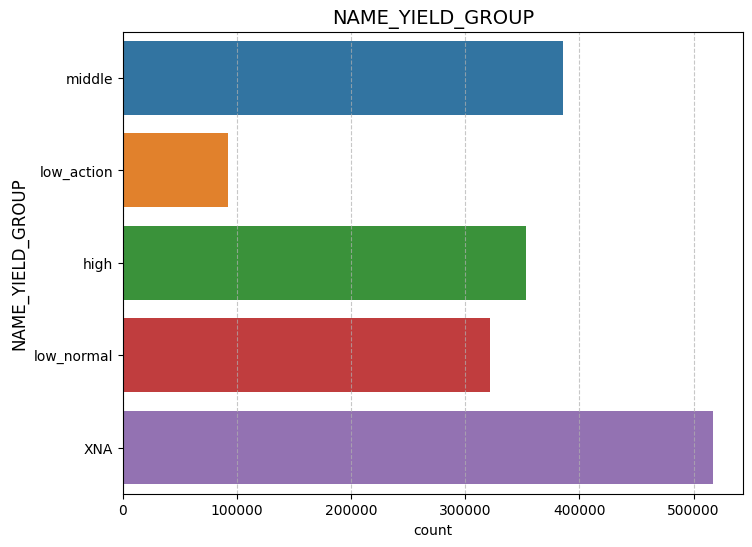

In [75]:
plt.figure(figsize=(8, 6))
sns.countplot(y=df_previous_application_cleaned["NAME_YIELD_GROUP"])
plt.title("NAME_YIELD_GROUP", fontsize=14)
plt.ylabel("NAME_YIELD_GROUP", fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

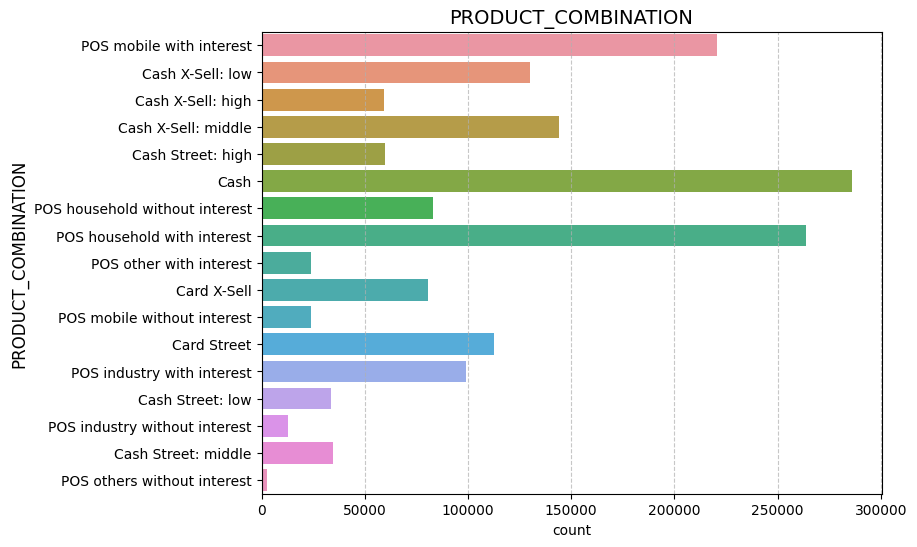

In [76]:
plt.figure(figsize=(8, 6))
sns.countplot(y=df_previous_application_cleaned["PRODUCT_COMBINATION"])
plt.title("PRODUCT_COMBINATION", fontsize=14)
plt.ylabel("PRODUCT_COMBINATION", fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

## Retirando outliers

In [77]:
df_previous_application_cleaned = remove_outliers_all(df_previous_application_cleaned, target_column="TARGET")

## Aplication test

In [78]:
df_application_test = pd.read_csv("/kaggle/input/credit-aws/application_test.csv")

# EDA

In [79]:
df_application_test

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pan

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,456221,Cash loans,F,N,Y,0,121500.0,412560.0,17473.5,270000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
48740,456222,Cash loans,F,N,N,2,157500.0,622413.0,31909.5,495000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
48741,456223,Cash loans,F,Y,Y,1,202500.0,315000.0,33205.5,315000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,3.0,1.0
48742,456224,Cash loans,M,N,N,0,225000.0,450000.0,25128.0,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0


In [80]:
df_application_test.isna().sum()

SK_ID_CURR                       0
NAME_CONTRACT_TYPE               0
CODE_GENDER                      0
FLAG_OWN_CAR                     0
FLAG_OWN_REALTY                  0
                              ... 
AMT_REQ_CREDIT_BUREAU_DAY     6049
AMT_REQ_CREDIT_BUREAU_WEEK    6049
AMT_REQ_CREDIT_BUREAU_MON     6049
AMT_REQ_CREDIT_BUREAU_QRT     6049
AMT_REQ_CREDIT_BUREAU_YEAR    6049
Length: 121, dtype: int64

In [81]:
df_application_test.duplicated().sum()

0

In [82]:
df_application_test_cleaned = df_application_test.copy()
df_application_test_cleaned = remove_high_null_columns(df_application_test_cleaned, threshold=0.1)
df_application_test_cleaned = remove_unbalanced_columns(df_application_test_cleaned, threshold=0.60)
df_application_test_cleaned = remove_highly_correlated(df_application_test_cleaned, threshold=0.80)

/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)


## Retirando os outliers

In [83]:
df_application_test_cleaned = remove_outliers_all(df_application_test_cleaned, target_column="TARGET")

/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater_equal
  return op(a, b)
/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less_equal
  return op(a, b)
/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater_equal
  return op(a, b)
/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less_equal
  return op(a, b)
/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater_equal
  return op(a, b)
/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less_equal
  return op(a, b)


In [84]:
df_application_test_cleaned

,SK_ID_CURR,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_INCOME_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,ORGANIZATION_TYPE,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE
0,100001,135000.0,568800.0,20560.5,Working,0.018850,-19241,-2329,-5170.0,-812,2.0,TUESDAY,18,Kindergarten,0.789654,0.0,-1740.0
1,100005,99000.0,222768.0,17370.0,Working,0.035792,-18064,-4469,-9118.0,-1623,2.0,FRIDAY,9,Self-employed,0.291656,0.0,0.0
4,100038,180000.0,625500.0,32067.0,Working,0.010032,-13040,-2191,-4000.0,-4262,3.0,FRIDAY,5,Business Entity Type 3,0.425687,0.0,-821.0
6,100057,180000.0,499221.0,22117.5,Working,0.022800,-16685,-2580,-10125.0,-241,4.0,THURSDAY,9,Industry: type 9,0.571084,1.0,-1182.0
7,100065,166500.0,180000.0,14220.0,Working,0.005144,-9516,-1387,-5063.0,-2055,1.0,FRIDAY,7,Self-employed,0.613033,0.0,-1182.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,456221,121500.0,412560.0,17473.5,Working,0.002042,-19970,-5169,-9094.0,-3399,1.0,WEDNESDAY,16,Other,0.648575,1.0,-684.0
48740,456222,157500.0,622413.0,31909.5,Commercial associate,0.035792,-11186,-1149,-3015.0,-3003,4.0,MONDAY,11,Trade: type 7,0.684596,2.0,0.0
48741,456223,202500.0,315000.0,33205.5,Commercial associate,0.026392,-15922,-3037,-2681.0,-1504,3.0,WEDNESDAY,12,Business Entity Type 3,0.632770,0.0,-838.0
48742,456224,225000.0,450000.0,25128.0,Commercial associate,0.018850,-13968,-2731,-1461.0,-1364,2.0,MONDAY,10,Self-employed,0.445701,0.0,-2308.0


In [85]:
import dask.dataframe as dd

def reduce_memory(df):
    for col in df.select_dtypes(include=["int64", "float64"]).columns:
        df[col] = df[col].astype("float32" if "float" in str(df[col].dtype) else "int32")
    return df

# Convertendo os DataFrames para Dask DataFrame
df_application_train_cleaned = dd.from_pandas(df_application_train_cleaned, npartitions=10)
df_previous_application_cleaned = dd.from_pandas(df_previous_application_cleaned, npartitions=10)
df_bureau_cleaned = dd.from_pandas(df_bureau_cleaned, npartitions=10)

# Aplicando a redução de memória
df_application_train_cleaned = reduce_memory(df_application_train_cleaned)
df_previous_application_cleaned = reduce_memory(df_previous_application_cleaned)
df_bureau_cleaned = reduce_memory(df_bureau_cleaned)

# Realizando o merge de forma eficiente com Dask
df_merged = (
    df_application_train_cleaned
    .merge(df_previous_application_cleaned, on="SK_ID_CURR", how="inner")
    .merge(df_bureau_cleaned, on="SK_ID_CURR", how="inner")
)

# Computa o resultado de forma controlada
df_merged = df_merged.compute()
df_merged


,SK_ID_CURR,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_INCOME_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP,PRODUCT_COMBINATION,SK_ID_BUREAU,DAYS_CREDIT,DAYS_CREDIT_ENDDATE,AMT_CREDIT_SUM,DAYS_CREDIT_UPDATE
0,420953,112500.0,450000.0,22018.5,Working,0.035792,-13885,-3344,-2342.0,-3277,...,Stone,70,Consumer electronics,middle,POS household with interest,5487304,-2770,-943.0,450000.0,-660
1,420953,112500.0,450000.0,22018.5,Working,0.035792,-13885,-3344,-2342.0,-3277,...,Stone,70,Consumer electronics,middle,POS household with interest,5487305,-2239,-2058.0,22180.5,-2017
2,420953,112500.0,450000.0,22018.5,Working,0.035792,-13885,-3344,-2342.0,-3277,...,Stone,70,Consumer electronics,middle,POS household with interest,5487306,-1456,370.0,310500.0,-29
3,420953,112500.0,450000.0,22018.5,Working,0.035792,-13885,-3344,-2342.0,-3277,...,Credit and cash offices,-1,XNA,XNA,Cash,5487304,-2770,-943.0,450000.0,-660
4,420953,112500.0,450000.0,22018.5,Working,0.035792,-13885,-3344,-2342.0,-3277,...,Credit and cash offices,-1,XNA,XNA,Cash,5487305,-2239,-2058.0,22180.5,-2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254988,135830,90000.0,414229.5,15615.0,Commercial associate,0.035792,-17059,-3846,-5028.0,-565,...,Country-wide,25,Connectivity,low_normal,POS mobile with interest,5332363,-1581,-1216.0,161505.0,-1216
254989,135830,90000.0,414229.5,15615.0,Commercial associate,0.035792,-17059,-3846,-5028.0,-565,...,Country-wide,38,Connectivity,high,POS mobile with interest,5332363,-1581,-1216.0,161505.0,-1216
254990,135830,90000.0,414229.5,15615.0,Commercial associate,0.035792,-17059,-3846,-5028.0,-565,...,Stone,102,Consumer electronics,low_action,POS household without interest,5332363,-1581,-1216.0,161505.0,-1216
254991,135855,121500.0,450000.0,21109.5,Commercial associate,0.046220,-9487,-1137,-4243.0,-2162,...,Country-wide,20,Connectivity,high,POS mobile with interest,6640769,-665,962.0,0.0,-636


In [86]:
df_merged.columns

Index(['SK_ID_CURR', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'NAME_INCOME_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'CNT_FAM_MEMBERS', 'WEEKDAY_APPR_PROCESS_START_x',
       'HOUR_APPR_PROCESS_START_x', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'TARGET',
       'SK_ID_PREV', 'NAME_CONTRACT_TYPE', 'AMT_APPLICATION',
       'WEEKDAY_APPR_PROCESS_START_y', 'HOUR_APPR_PROCESS_START_y',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION', 'SK_ID_BUREAU',
       'DAYS_CREDIT', 'DAYS_CREDIT_ENDDATE', 'AMT_CRE

## Separando dados

In [87]:
df_numericos = df_merged.select_dtypes(include=['number'])
df_categoricos = df_merged.select_dtypes(include=['object', 'category'])

## Correlacao

/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


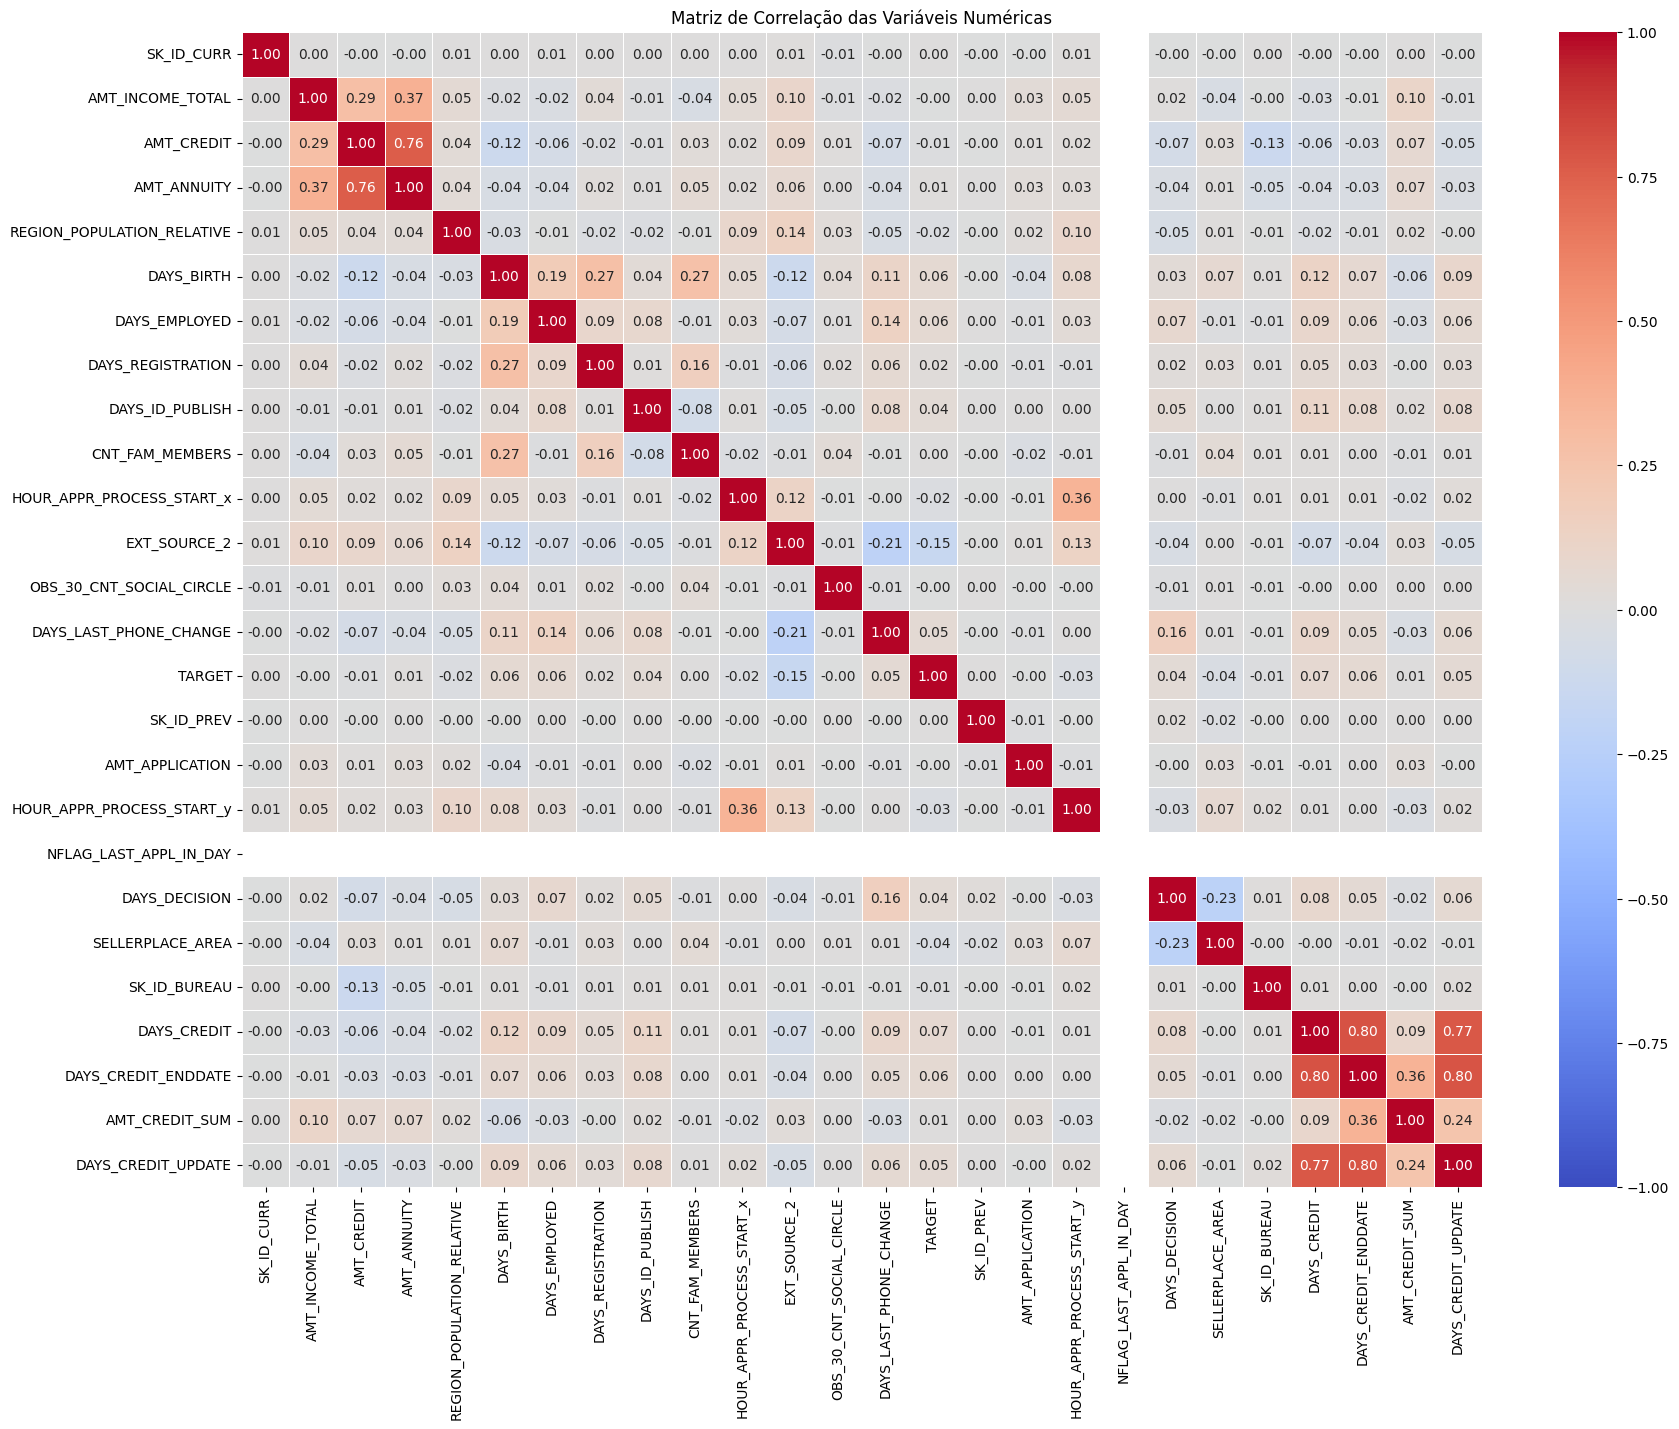

In [88]:
correlacao = df_numericos.corr()


plt.figure(figsize=(20, 15))
sns.heatmap(correlacao, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title("Matriz de Correlação das Variáveis Numéricas")
plt.show()

## Transformando os dados 

In [89]:
cat_cols = df_merged.select_dtypes(exclude=["number"]).columns
df_encoded = pd.get_dummies(df_merged[cat_cols], drop_first=True)
df_encoded

,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Working,WEEKDAY_APPR_PROCESS_START_x_MONDAY,WEEKDAY_APPR_PROCESS_START_x_SATURDAY,WEEKDAY_APPR_PROCESS_START_x_SUNDAY,WEEKDAY_APPR_PROCESS_START_x_THURSDAY,WEEKDAY_APPR_PROCESS_START_x_TUESDAY,WEEKDAY_APPR_PROCESS_START_x_WEDNESDAY,...,PRODUCT_COMBINATION_Cash X-Sell: low,PRODUCT_COMBINATION_Cash X-Sell: middle,PRODUCT_COMBINATION_POS household with interest,PRODUCT_COMBINATION_POS household without interest,PRODUCT_COMBINATION_POS industry with interest,PRODUCT_COMBINATION_POS industry without interest,PRODUCT_COMBINATION_POS mobile with interest,PRODUCT_COMBINATION_POS mobile without interest,PRODUCT_COMBINATION_POS other with interest,PRODUCT_COMBINATION_POS others without interest
0,False,False,False,True,False,False,False,False,True,False,...,False,False,True,False,False,False,False,False,False,False
1,False,False,False,True,False,False,False,False,True,False,...,False,False,True,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,True,False,...,False,False,True,False,False,False,False,False,False,False
3,False,False,False,True,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254988,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False
254989,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False
254990,False,False,False,False,False,False,True,False,False,False,...,False,False,False,True,False,False,False,False,False,False
254991,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False


## Concatenacao

In [90]:
df_final = pd.concat([df_numericos, df_encoded], axis=1)
df_final

,SK_ID_CURR,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,...,PRODUCT_COMBINATION_Cash X-Sell: low,PRODUCT_COMBINATION_Cash X-Sell: middle,PRODUCT_COMBINATION_POS household with interest,PRODUCT_COMBINATION_POS household without interest,PRODUCT_COMBINATION_POS industry with interest,PRODUCT_COMBINATION_POS industry without interest,PRODUCT_COMBINATION_POS mobile with interest,PRODUCT_COMBINATION_POS mobile without interest,PRODUCT_COMBINATION_POS other with interest,PRODUCT_COMBINATION_POS others without interest
0,420953,112500.0,450000.0,22018.5,0.035792,-13885,-3344,-2342.0,-3277,2.0,...,False,False,True,False,False,False,False,False,False,False
1,420953,112500.0,450000.0,22018.5,0.035792,-13885,-3344,-2342.0,-3277,2.0,...,False,False,True,False,False,False,False,False,False,False
2,420953,112500.0,450000.0,22018.5,0.035792,-13885,-3344,-2342.0,-3277,2.0,...,False,False,True,False,False,False,False,False,False,False
3,420953,112500.0,450000.0,22018.5,0.035792,-13885,-3344,-2342.0,-3277,2.0,...,False,False,False,False,False,False,False,False,False,False
4,420953,112500.0,450000.0,22018.5,0.035792,-13885,-3344,-2342.0,-3277,2.0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254988,135830,90000.0,414229.5,15615.0,0.035792,-17059,-3846,-5028.0,-565,1.0,...,False,False,False,False,False,False,True,False,False,False
254989,135830,90000.0,414229.5,15615.0,0.035792,-17059,-3846,-5028.0,-565,1.0,...,False,False,False,False,False,False,True,False,False,False
254990,135830,90000.0,414229.5,15615.0,0.035792,-17059,-3846,-5028.0,-565,1.0,...,False,False,False,True,False,False,False,False,False,False
254991,135855,121500.0,450000.0,21109.5,0.046220,-9487,-1137,-4243.0,-2162,2.0,...,False,False,False,False,False,False,True,False,False,False


In [91]:
X = df_final.drop(columns=["TARGET"])  
y = df_final["TARGET"]  

In [92]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalização para modelos baseados em distância
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Modelos

## regressao logistica

In [93]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

model_logreg = LogisticRegression(max_iter=1000, random_state=42)
model_logreg.fit(X_train, y_train)

y_pred_logreg = model_logreg.predict(X_test)
print("Regressão Logística")
print(classification_report(y_test, y_pred_logreg))
print("AUC ROC:", roc_auc_score(y_test, y_pred_logreg))


Regressão Logística
              precision    recall  f1-score   support

           0       0.90      1.00      0.95    469845
           1       0.50      0.00      0.00     50070

    accuracy                           0.90    519915
   macro avg       0.70      0.50      0.48    519915
weighted avg       0.86      0.90      0.86    519915

AUC ROC: 0.5006234645375095


## Decision Tree

In [94]:
from sklearn.tree import DecisionTreeClassifier

model_tree = DecisionTreeClassifier(max_depth=5, random_state=42)
model_tree.fit(X_train, y_train)

y_pred_tree = model_tree.predict(X_test)
print("\nDecision Tree")
print(classification_report(y_test, y_pred_tree))
print("AUC ROC:", roc_auc_score(y_test, y_pred_tree))



Decision Tree
              precision    recall  f1-score   support

           0       0.91      1.00      0.95    469845
           1       0.81      0.02      0.03     50070

    accuracy                           0.90    519915
   macro avg       0.86      0.51      0.49    519915
weighted avg       0.90      0.90      0.86    519915

AUC ROC: 0.5084943171313825


## Xgboost

In [95]:
import xgboost as xgb
from sklearn.metrics import classification_report, roc_auc_score

model_xgb = xgb.XGBClassifier(max_depth=5, random_state=42, use_label_encoder=False, eval_metric="logloss")
model_xgb.fit(X_train, y_train)

y_pred_xgb = model_xgb.predict(X_test)

print("\nXGBoost")
print(classification_report(y_test, y_pred_xgb))
print("AUC ROC:", roc_auc_score(y_test, y_pred_xgb))



XGBoost
              precision    recall  f1-score   support

           0       0.92      1.00      0.96    469845
           1       0.94      0.18      0.30     50070

    accuracy                           0.92    519915
   macro avg       0.93      0.59      0.63    519915
weighted avg       0.92      0.92      0.89    519915

AUC ROC: 0.5897429127427712


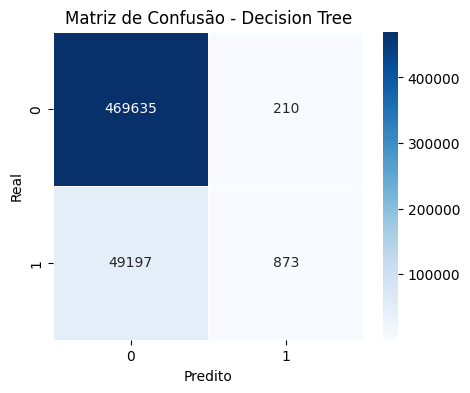

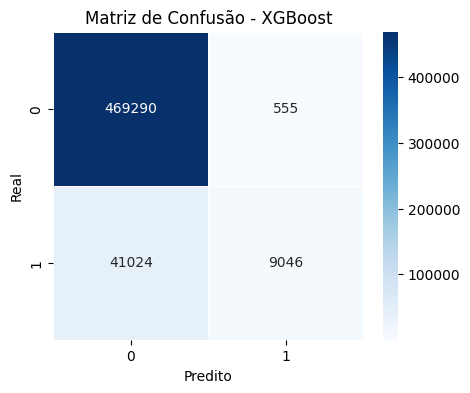

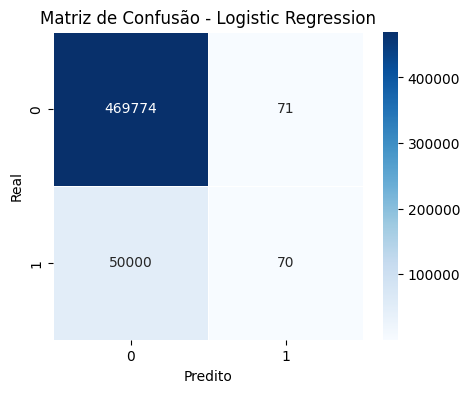

In [98]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", linewidths=0.5)
    plt.xlabel("Predito")
    plt.ylabel("Real")
    plt.title(f"Matriz de Confusão - {model_name}")
    plt.show()


# Matriz de Confusão - Decision Tree
plot_confusion_matrix(y_test, y_pred_tree, "Decision Tree")

# Matriz de Confusão - XGBoost
plot_confusion_matrix(y_test, y_pred_xgb, "XGBoost")

# Matriz de Confusão - Regressão Logística
plot_confusion_matrix(y_test, y_pred_logreg, "Logistic Regression")